This Notebook for EDA

Load dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")

print("Path to dataset files:", path)

100%|██████████| 16.5M/16.5M [00:02<00:00, 8.28MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yashdevladdha/uber-ride-analytics-dashboard/versions/2


Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df=pd.read_csv(os.path.join(path, "ncr_ride_bookings.csv"))

Data Understanding

In [4]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [5]:
df.shape

(150000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg VTAT,139500.0,8.456352,3.773564,2.0,5.30,8.30,11.30,20.0
Avg CTAT,102000.0,29.149636,8.902577,10.0,21.60,28.80,36.80,45.0
Cancelled Rides by Customer,10500.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0
Cancelled Rides by Driver,27000.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0
Incomplete Rides,9000.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0
Booking Value,102000.0,508.295912,395.805774,50.0,234.00,414.00,689.00,4277.0
Ride Distance,102000.0,24.637012,14.002138,1.0,12.46,23.72,36.82,50.0
Driver Ratings,93000.0,4.230992,0.436871,3.0,4.10,4.30,4.60,5.0
Customer Rating,93000.0,4.404584,0.437819,3.0,4.20,4.50,4.80,5.0


In [8]:
df.dtypes

,0
Date,object
Time,object
Booking ID,object
Booking Status,object
Customer ID,object
Vehicle Type,object
Pickup Location,object
Drop Location,object
Avg VTAT,float64
Avg CTAT,float64


Data Type categories

In [9]:
#Date → datetime64[ns]
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

In [10]:
#Time → datetime64[ns] (or extract Hour only)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Hour'] = df['Time'].dt.hour


In [11]:
df[["Date","Time","Hour","Weekday","Month"]].dtypes

,0
Date,datetime64[ns]
Time,datetime64[ns]
Hour,int32
Weekday,object
Month,object


In [12]:
#Booking ID → string
df['Booking ID'] = df['Booking ID'].astype('string')
#Booking Status → category
df['Booking Status'] = df['Booking Status'].astype('category')
#Customer ID → string
df['Customer ID'] = df['Customer ID'].astype('string')
#Vehicle Type → category
df['Vehicle Type'] = df['Vehicle Type'].astype('category')
#Pickup Location → category
df['Pickup Location'] = df['Pickup Location'].astype('category')
#Drop Location → category
df['Drop Location'] = df['Drop Location'].astype('category')

In [13]:
df.dtypes

,0
Date,datetime64[ns]
Time,datetime64[ns]
Booking ID,string[python]
Booking Status,category
Customer ID,string[python]
Vehicle Type,category
Pickup Location,category
Drop Location,category
Avg VTAT,float64
Avg CTAT,float64


BUSINESS & PRODUCT ANALYTICS (Non-ML insights)

A. Rider Behavior Analysis

Peak Booking Hours

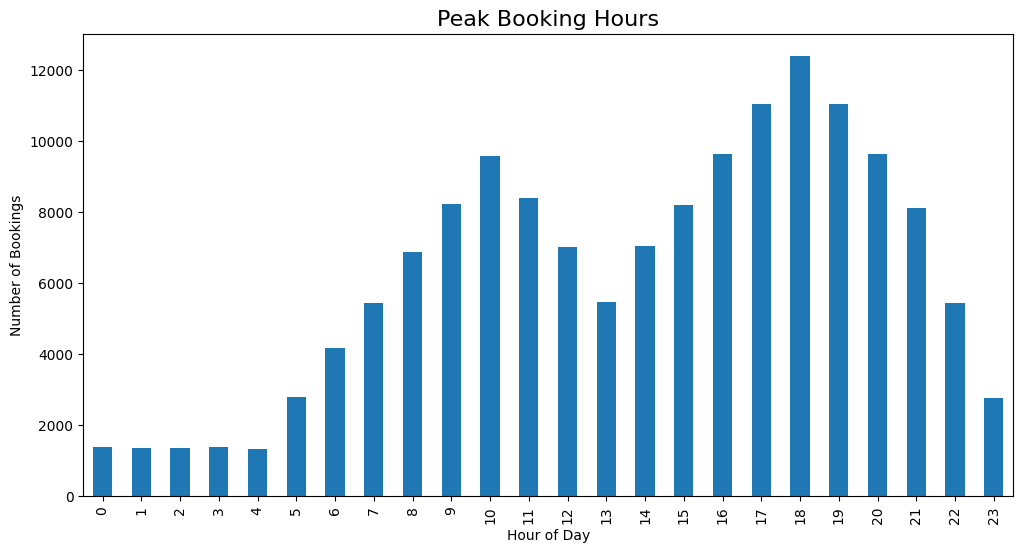

In [14]:
plt.figure(figsize=(12,6))
df['Hour'].value_counts().sort_index().plot(kind='bar')

plt.title("Peak Booking Hours", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Bookings")
plt.show()


Bookings start rising sharply from 5 AM → 10 AM.

There's a major morning peak at ~10 AM.

An even stronger evening peak at ~6 PM (18:00), the highest point.

After 8 PM, demand gradually decreases.

Late night hours (00:00–04:00) have minimal bookings.

WHY?
Morning commute: Riders travel to offices, schools, metro stations.

Evening commute: The strongest peak — offices closing, mall/social movement.

Night low: Fewer people traveling late; drivers also fewer.

Peak rider demand occurs at 10 AM (morning peak) and a stronger 6 PM peak (evening commute), showing a classic daily commute pattern for ride-hailing customers.

Weekly Patterns (Day-of-Week)

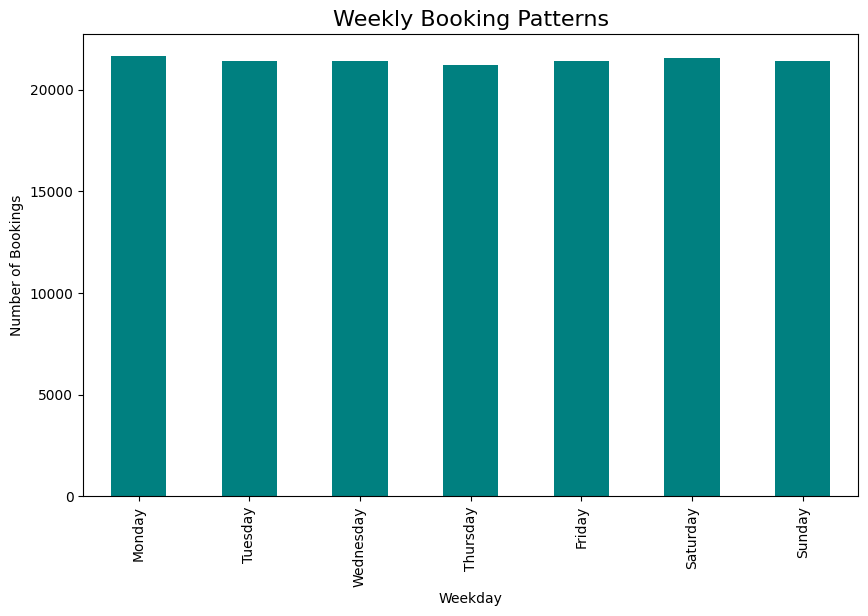

In [15]:
plt.figure(figsize=(10,6))
df['Weekday'].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).plot(kind='bar', color='teal')

plt.title("Weekly Booking Patterns", fontsize=16)
plt.ylabel("Number of Bookings")
plt.show()


Very small difference between:

Monday–Thursday

Friday slightly up

Saturday–Sunday also almost same

There is no obvious weekly trend.

Bookings remain consistently distributed across all days of the week, indicating stable daily demand without clear weekday/weekend fluctuations.

Month-Over-Month Trends

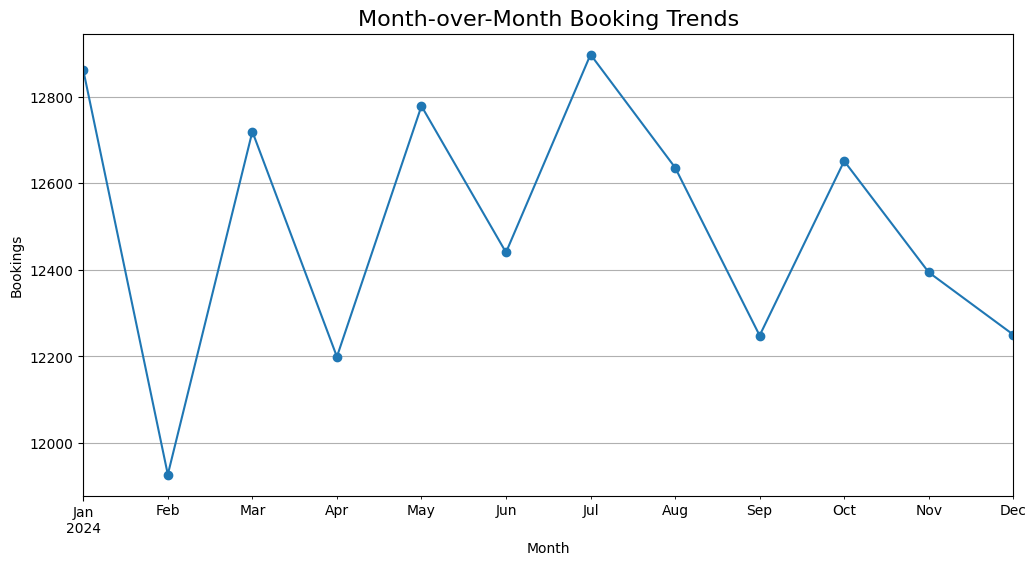

In [16]:
df['YearMonth'] = df['Date'].dt.to_period('M')

plt.figure(figsize=(12,6))
df['YearMonth'].value_counts().sort_index().plot(kind='line', marker='o')

plt.title("Month-over-Month Booking Trends", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Bookings")
plt.grid(True)
plt.show()


Monthly bookings stay between 11,900 – 12,900

Very small variation (<8% difference from peak to low)

Slight peaks: January, March, May, July, October

Small dips: February, April, September, December


No strong seasonality

Ride demand is stable month-to-month

Some periodic fluctuations (likely noise)


Ride volume is consistent across months with minor fluctuations, suggesting that overall platform demand is stable throughout 2024.

Rider Retention Analysis (Repeat Users)

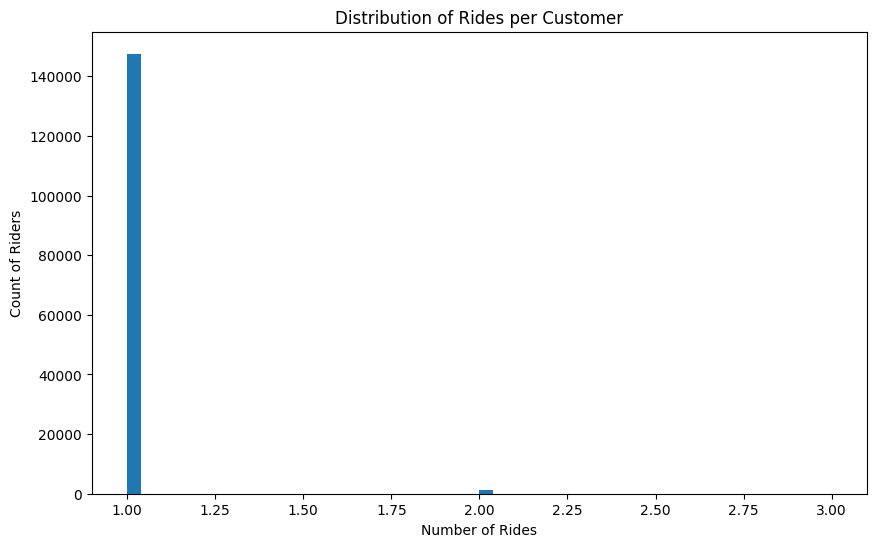

In [17]:
rides_per_customer = df['Customer ID'].value_counts()
plt.figure(figsize=(10,6))
rides_per_customer.plot(kind='hist', bins=50)

plt.title("Distribution of Rides per Customer")
plt.xlabel("Number of Rides")
plt.ylabel("Count of Riders")
plt.show()


EXTREMELY low retention rate (less than 1%)
This means:

Almost all riders used the service only once.

People are not coming back.

This is not normal for real ride-hailing platforms (Uber retention is ~30–60%).

In [18]:
total_customers = df['Customer ID'].nunique()
repeat_customers = rides_per_customer[rides_per_customer > 1].count()
new_customers = rides_per_customer[rides_per_customer == 1].count()

repeat_rate = repeat_customers / total_customers
new_rate = new_customers / total_customers

print("Total riders:", total_customers)
print("Repeat riders:", repeat_customers)
print("Repeat rate:", repeat_rate)
print("New riders:", new_rate)


Total riders: 148788
Repeat riders: 1206
Repeat rate: 0.008105492378417614
New riders: 0.9918945076215824


The dataset shows a very low repeat rate (0.81%), suggesting either extremely low rider retention or that Customer IDs may not represent long-term unique users. This pattern is highly unusual for real-world ride-hailing platforms and should be considered when modeling behavior.

Top Pickup & Drop Hotspots

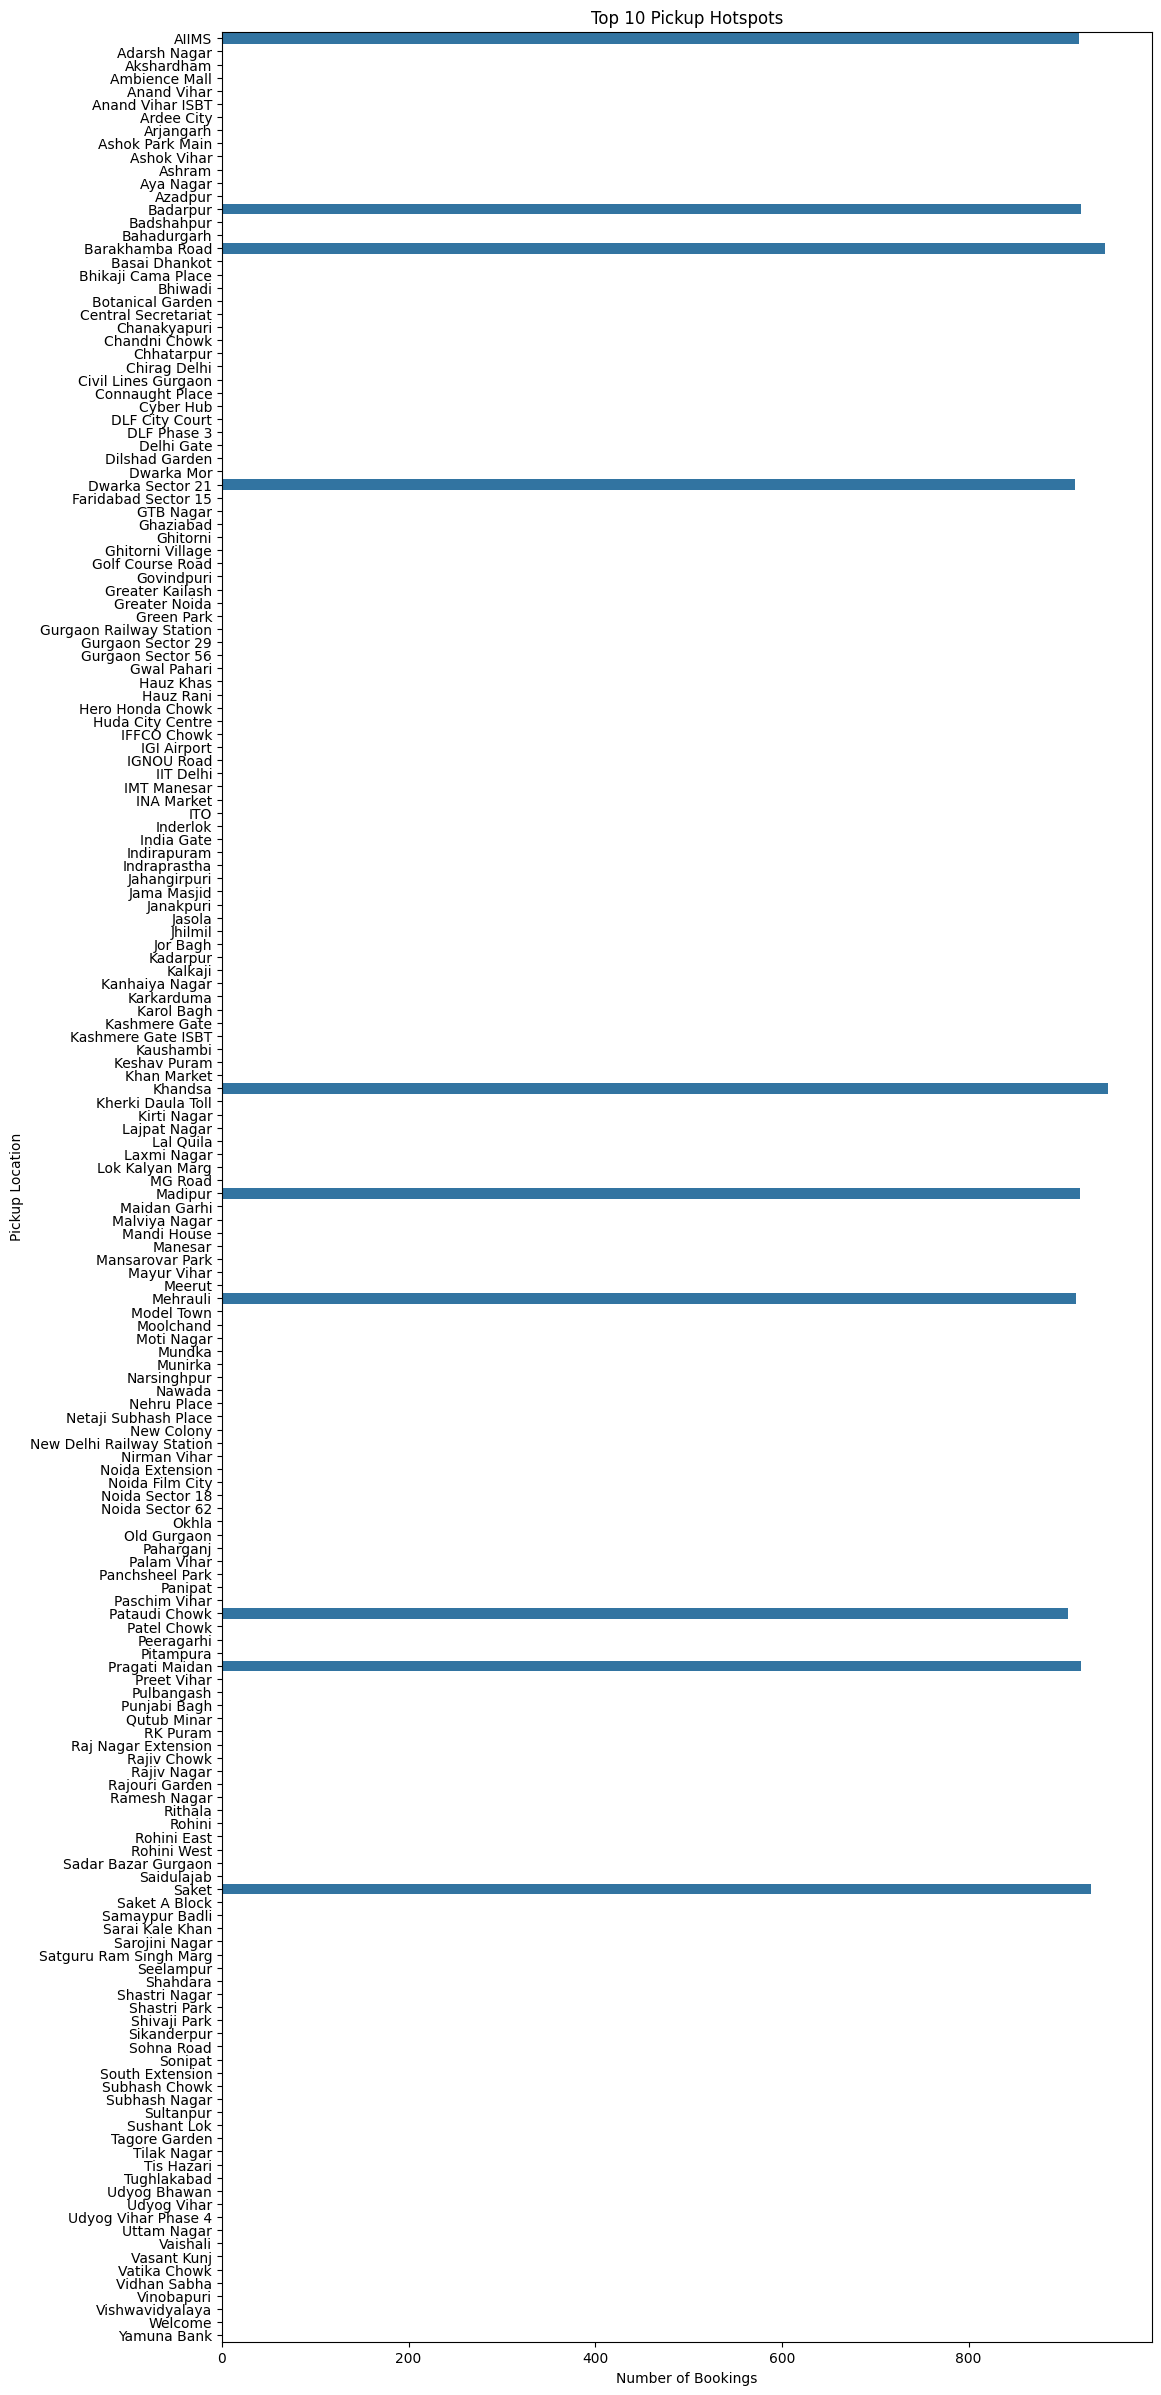

In [19]:
top_pickups = df['Pickup Location'].value_counts().head(10)
plt.figure(figsize=(12,30))
sns.barplot(x=top_pickups.values, y=top_pickups.index)

plt.title("Top 10 Pickup Hotspots")
plt.xlabel("Number of Bookings")
plt.ylabel("Pickup Location")
plt.show()


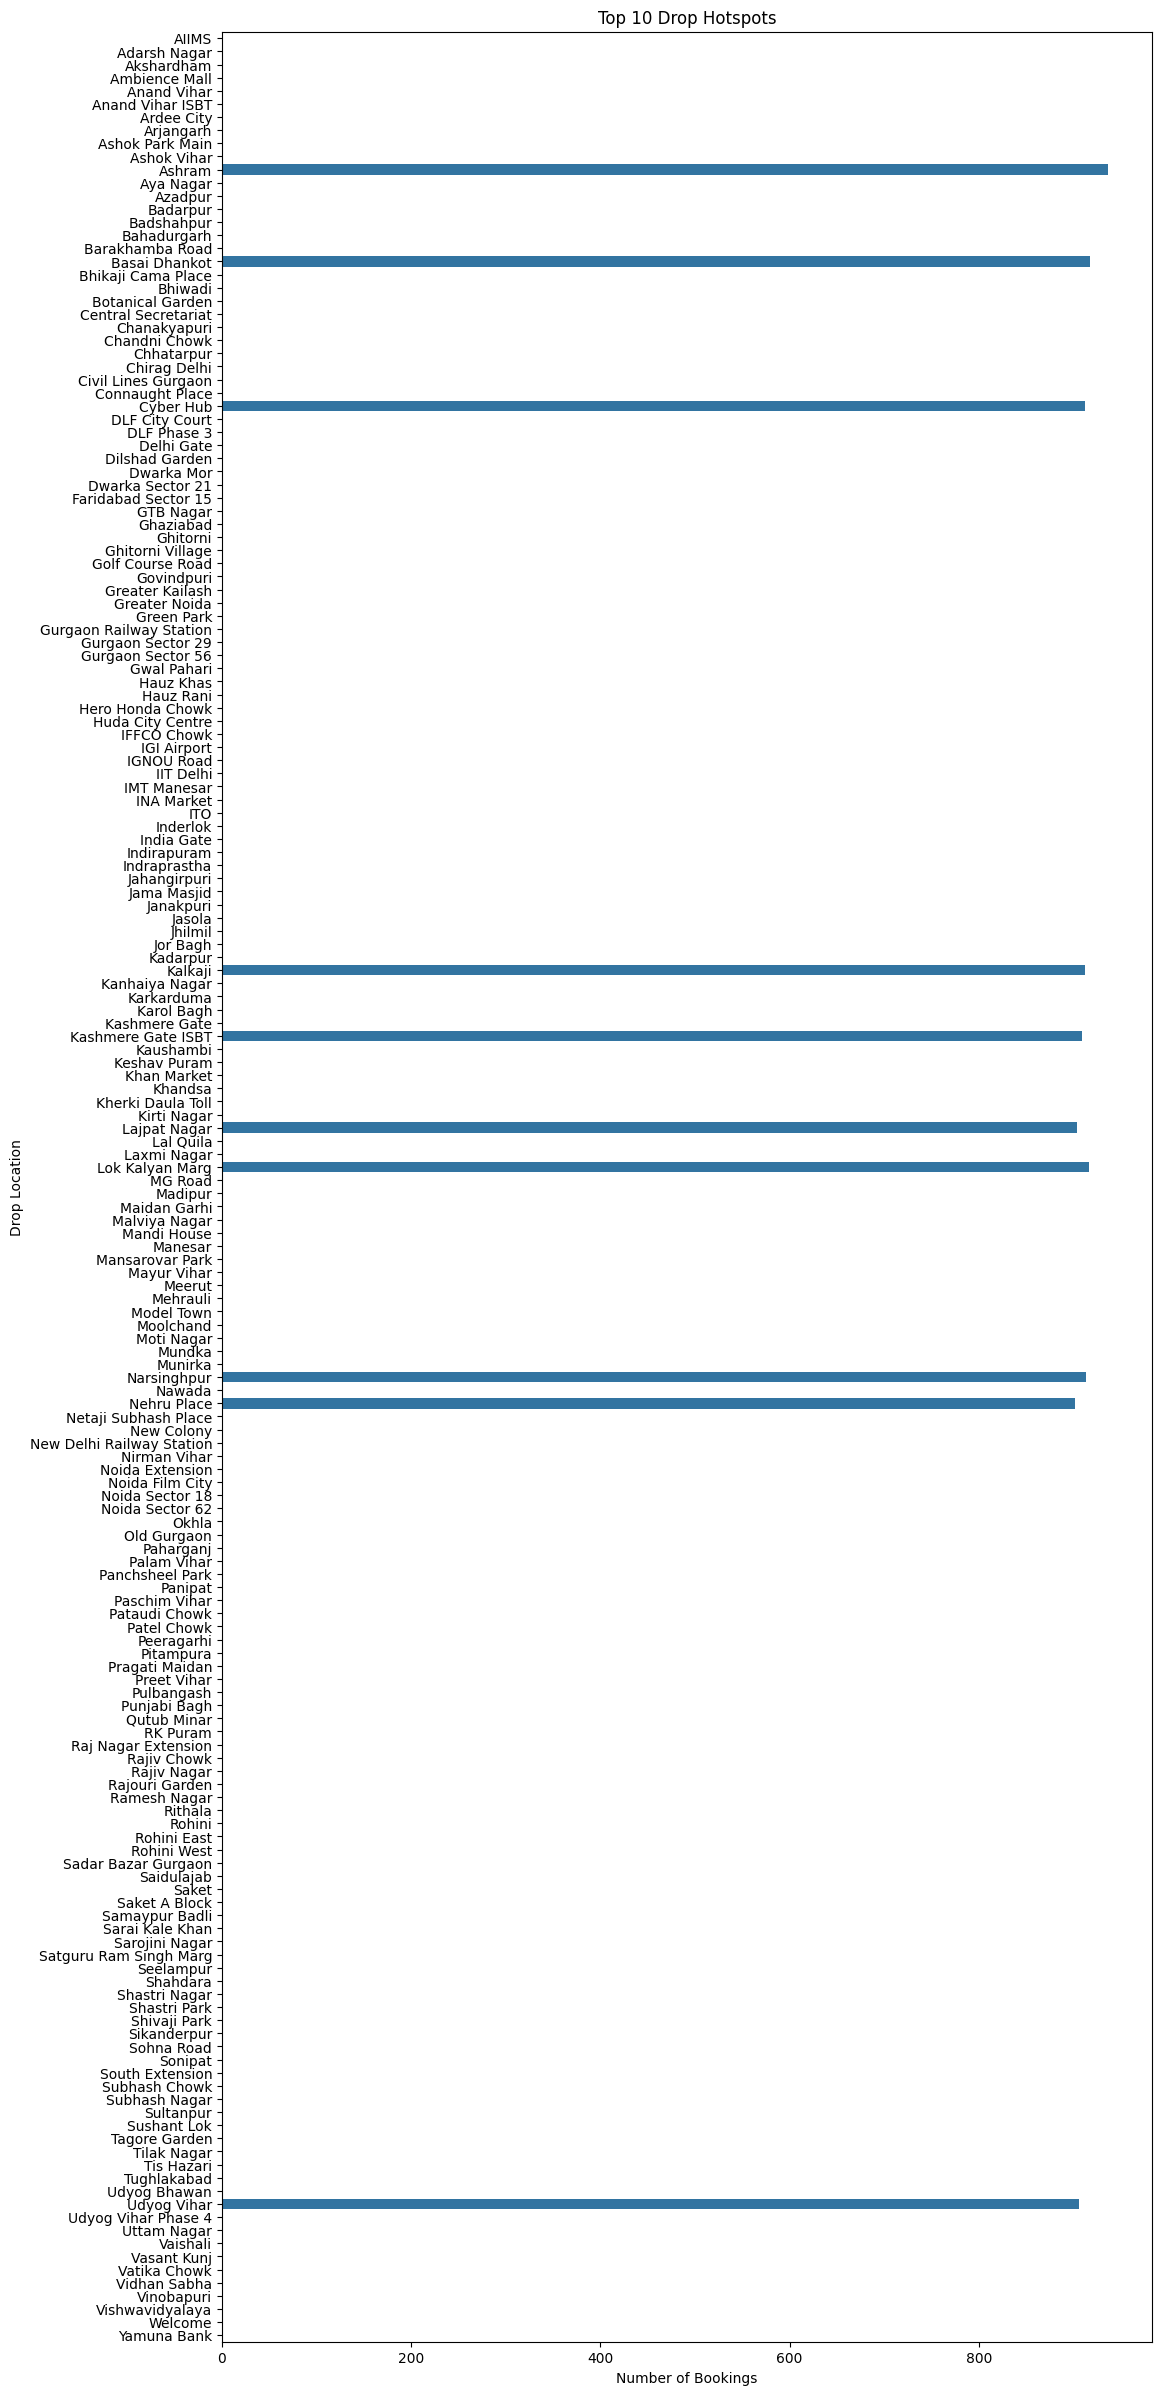

In [20]:
top_drops = df['Drop Location'].value_counts().head(10)

plt.figure(figsize=(12,30))
sns.barplot(x=top_drops.values, y=top_drops.index)

plt.title("Top 10 Drop Hotspots")
plt.xlabel("Number of Bookings")
plt.ylabel("Drop Location")
plt.show()


the top 10 include:

✔ Dwarka
✔ Kherki Daula Toll
✔ Mayur Vihar
✔ Nandasa
✔ Saket
✔ Udyog Vihar Phase 4

These locations are:

Business hubs

Metro-station surroundings

High-density residential areas

Industrial zones (Udyog Vihar)

Which perfectly aligns with:

Morning/evening commute peaks

Concentration of riders in urban hubs

B. Cancellation Analytics

CUSTOMER vs DRIVER CANCELLATIONS

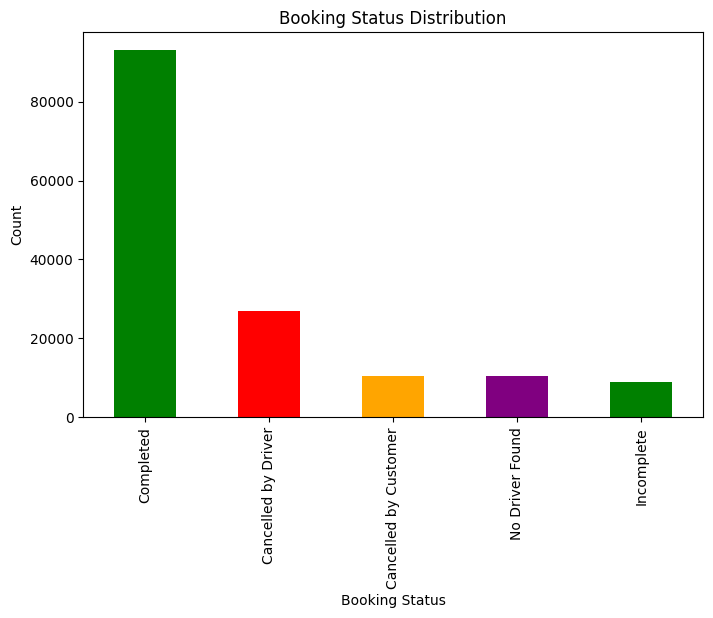

In [21]:
cancel_counts = df['Booking Status'].value_counts()

plt.figure(figsize=(8,5))
cancel_counts.plot(kind='bar', color=['green','red','orange','purple'])

plt.title("Booking Status Distribution")
plt.ylabel("Count")
plt.show()


In [22]:
(cancel_counts / len(df)) * 100

,count
Booking Status,
Completed,62.0
Cancelled by Driver,18.0
Cancelled by Customer,7.0
No Driver Found,7.0
Incomplete,6.0


Driver cancellations (18%) are more than double customer cancellations (7%).

A combined 31% failure rate (driver cancel + no driver + incomplete) is very high for a ride-hailing platform.

This suggests operational inefficiencies, likely due to:

Driver availability issues

Mismatched pickup distances

Traffic or urban congestion

Bad driver–customer matching

Cancellation by Time of Day

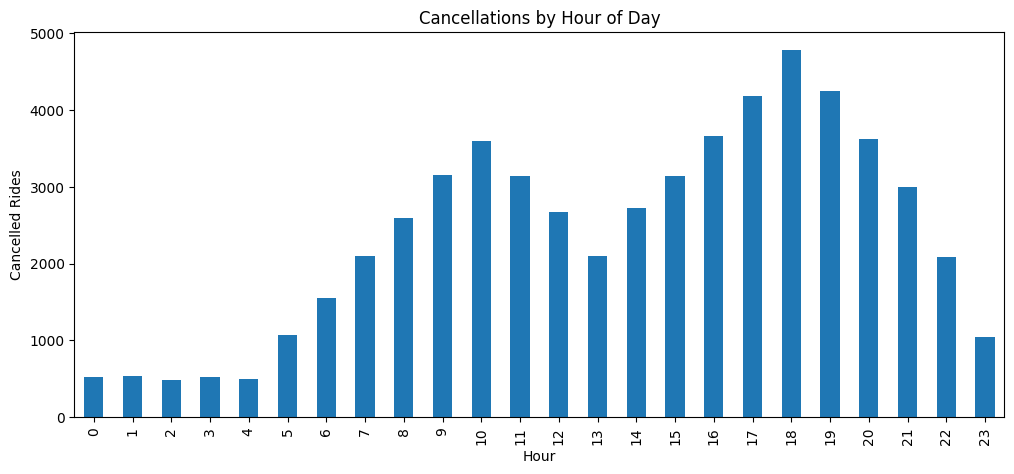

In [23]:
plt.figure(figsize=(12,5))
df[df['Booking Status'] != 'Completed'].groupby('Hour').size().plot(kind='bar')

plt.title("Cancellations by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Cancelled Rides")
plt.show()


Morning (7–10 AM) and evening peaks (5–8 PM) align with heavy traffic and commute rush.

High cancellation at 6 PM indicates:

Heavy traffic → drivers cancel long pickups

Riders cancel due to long ETA

Driver shortage in evening rush (competition for rides)

Evening peak is the worst for reliability.

Cancellation by Ride Distance

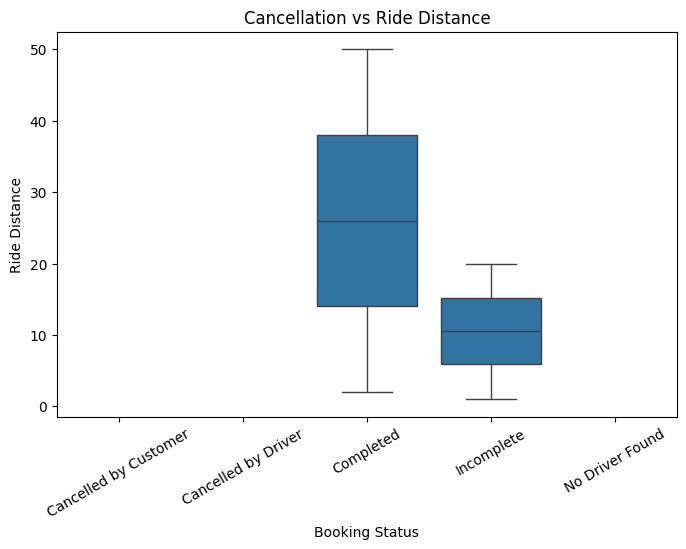

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Booking Status', y='Ride Distance')

plt.title("Cancellation vs Ride Distance")
plt.xticks(rotation=30)
plt.show()


Short-distance trips are most likely to be cancelled by drivers, possibly because:

Low earning potential

Driver prefers longer trips

Customers cancel longer trips if they see:

High fare

ETA increasing

Wrong route / mismatch


Cancellation by Vehicle Type

/tmp/ipython-input-1584840688.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['Booking Status'] != 'Completed'].groupby('Vehicle Type').size().sort_values().plot(kind='barh')


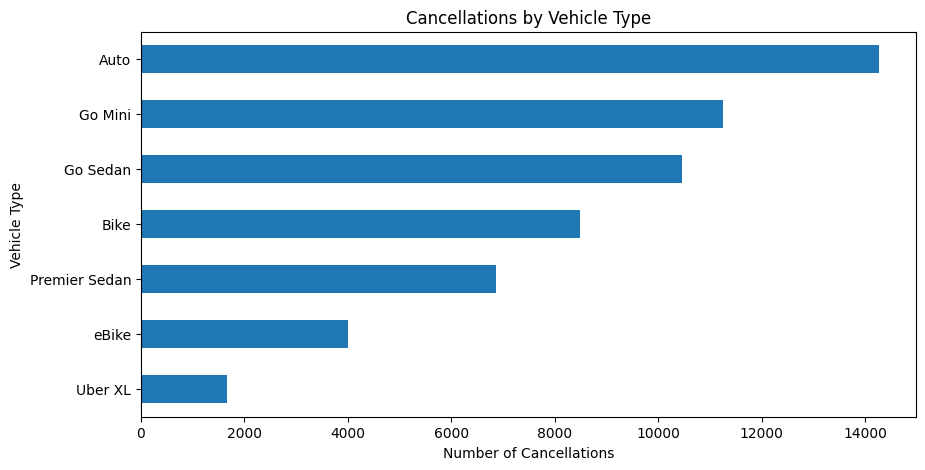

In [25]:
plt.figure(figsize=(10,5))
df[df['Booking Status'] != 'Completed'].groupby('Vehicle Type').size().sort_values().plot(kind='barh')

plt.title("Cancellations by Vehicle Type")
plt.xlabel("Number of Cancellations")
plt.show()


Autos and low-cost vehicles are more unreliable:

Higher driver churn

Inconsistent availability

Drivers often reject short trips

Premium cars have better discipline and incentive structure.


Low Driver Availability (No Driver Found)

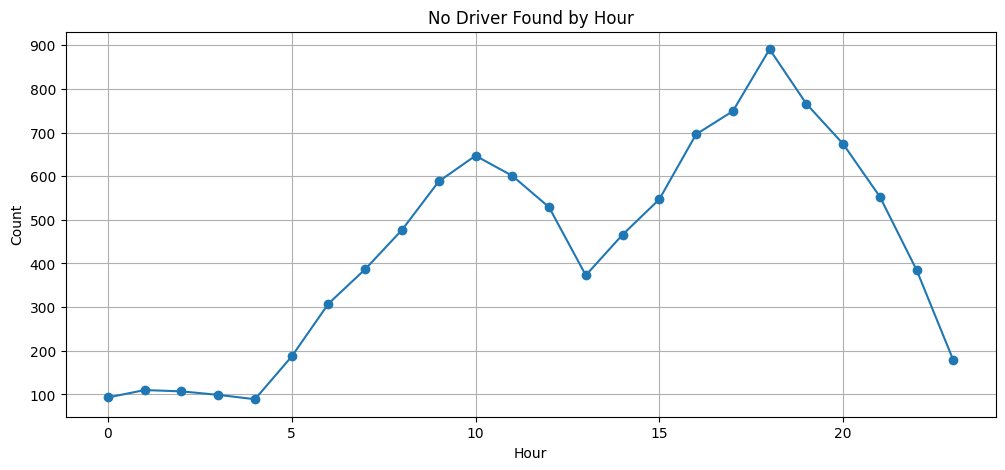

In [26]:
no_driver = df[df['Booking Status'] == 'No Driver Found']

plt.figure(figsize=(12,5))
no_driver.groupby('Hour').size().plot(kind='line', marker='o')

plt.title("No Driver Found by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.grid(True)
plt.show()


Evening peak causes a supply-demand mismatch:

Riders searching for rides ↑

Drivers finishing their work shift ↓

Traffic conditions worsen → drivers avoid new pickups

Suggests the platform needs dynamic pricing in the evening to attract drivers.

Top Cancellation Reasons (Customer & Driver)

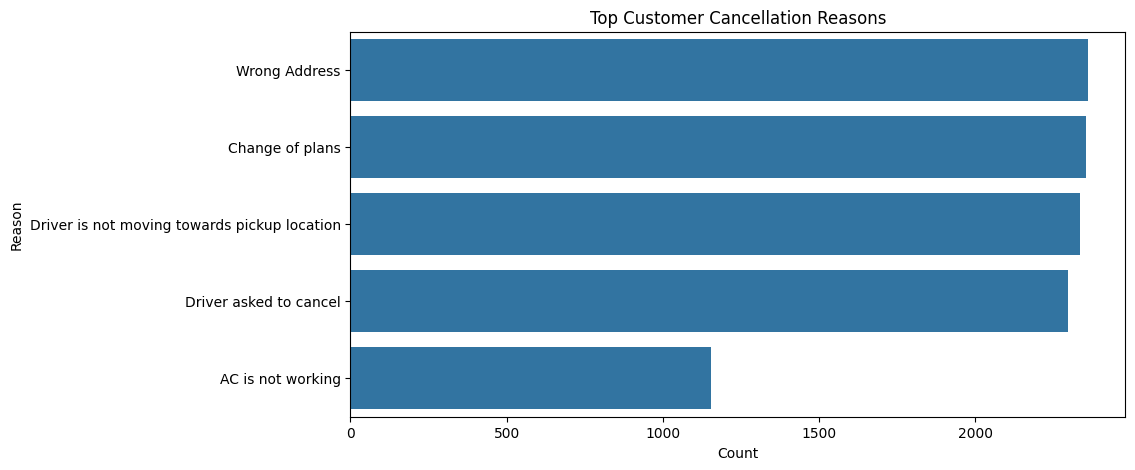

In [27]:
#Customer cancellation reasons
top_cust_reasons = df['Reason for cancelling by Customer'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cust_reasons.values, y=top_cust_reasons.index)

plt.title("Top Customer Cancellation Reasons")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()


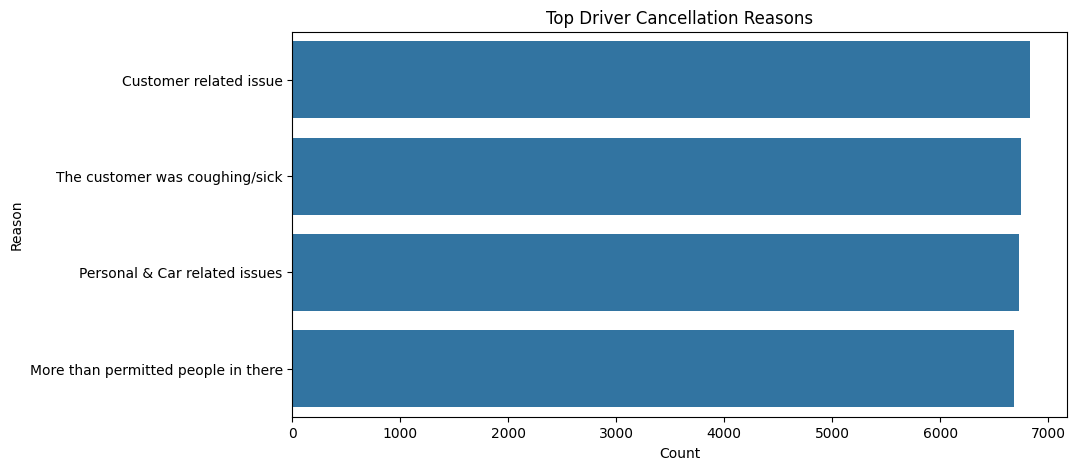

In [28]:
#Driver cancellation reasons
top_driver_reasons = df['Driver Cancellation Reason'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_driver_reasons.values, y=top_driver_reasons.index)

plt.title("Top Driver Cancellation Reasons")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()


"Driver not moving" + "driver asked to cancel" = operational reliability problem.

Wrong address = product UX issue (poor geolocation accuracy).

Strong sign that both app UI and driver behavior cause customer churn

Drivers reject customers who violate car rules (too many people).

"Coughing/sick" reasons spiked (maybe post-pandemic behavior influences).

Personal/car issues suggest unavailable or unwilling drivers.

Overall, this indicates:
→ Driver-side issues are a major contributor to cancellations (more than customer-side).

Cancellation Probability by VTAT (Arrival Time)

In [29]:
#Create binary “cancelled/not cancelled”
df['is_cancelled'] = df['Booking Status'].apply(
    lambda x: 0 if x == 'Completed' else 1
)
#Bin VTAT
df['VTAT_bin'] = pd.cut(df['Avg VTAT'], bins=[0,5,10,15,20,30,999], labels=['0-5','5-10','10-15','15-20','20-30','30+'])
#Cancellation probability
vtat_cancel_prob = df.groupby('VTAT_bin')['is_cancelled'].mean()


/tmp/ipython-input-2915970592.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vtat_cancel_prob = df.groupby('VTAT_bin')['is_cancelled'].mean()


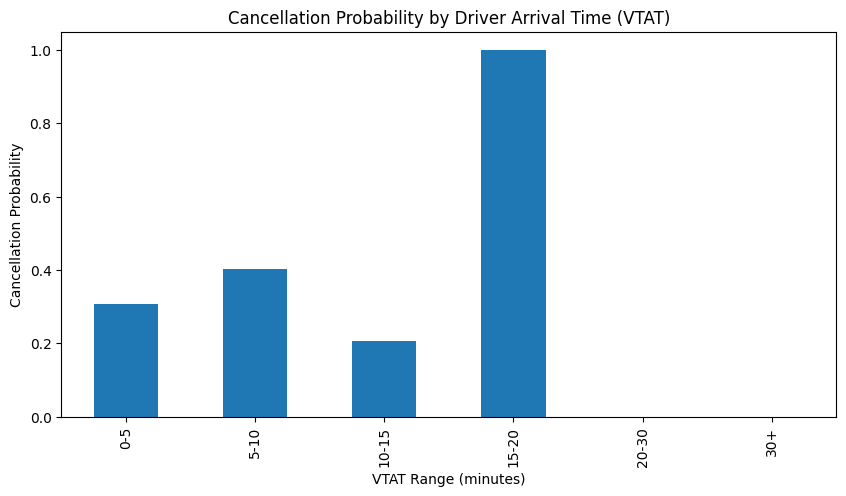

In [30]:
plt.figure(figsize=(10,5))
vtat_cancel_prob.plot(kind='bar')

plt.title("Cancellation Probability by Driver Arrival Time (VTAT)")
plt.xlabel("VTAT Range (minutes)")
plt.ylabel("Cancellation Probability")
plt.show()


Huge spike at 15–20 minutes — 100% cancellation probability.

This means:

No rider waits 15+ minutes for the driver.

Such ETAs are unacceptable and lead to guaranteed cancellations.

The platform likely fails to assign nearby drivers during peak hours → causing these spikes.

This is an extremely important insight for ML modeling:

VTAT is a strong predictor of cancellation and should be included as a key feature in your model.

C. Revenue & Payment Analytics

Payment Method Distribution

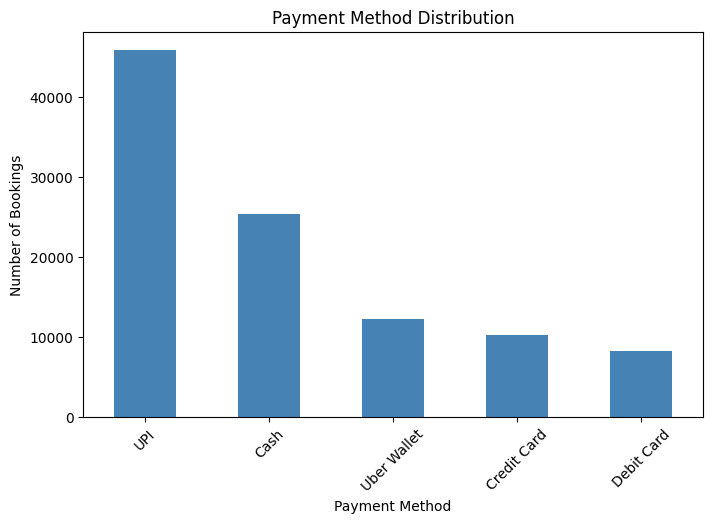

In [31]:
payment_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(8,5))
payment_counts.plot(kind='bar', color='steelblue')

plt.title("Payment Method Distribution")
plt.ylabel("Number of Bookings")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.show()


This shows a clear shift to digital payments, with UPI being the most preferred mode — consistent with India’s ride-hailing market.

Cash is still significant (~25K), which explains:

.   More cancellations for cash trips (drivers often avoid cash due to payout delays or lack of change).

Wallet + Cards form the smallest portion → customers avoid tying cards to ride apps.

Conclusion:
UPI drives the majority of cashless transactions, indicating strong digital adoption.

ARPU (Average Revenue Per User)

In [32]:
arpu = df.groupby('Customer ID')['Booking Value'].sum().mean()
print("ARPU:", arpu)


ARPU: 348.45675054439874


This means the average customer brings ~₹348 in total revenue.

Since  dataset shows 99% of riders take only 1 ride, ARPU is almost identical to the average ride value.

In real ride-hailing platforms:

Monthly ARPU ~₹450–₹600 for active users.

 ARPU is slightly lower → because of low repeat customers.

Conclusion:
The platform has many one-time users, lowering revenue per user and highlighting retention issues.

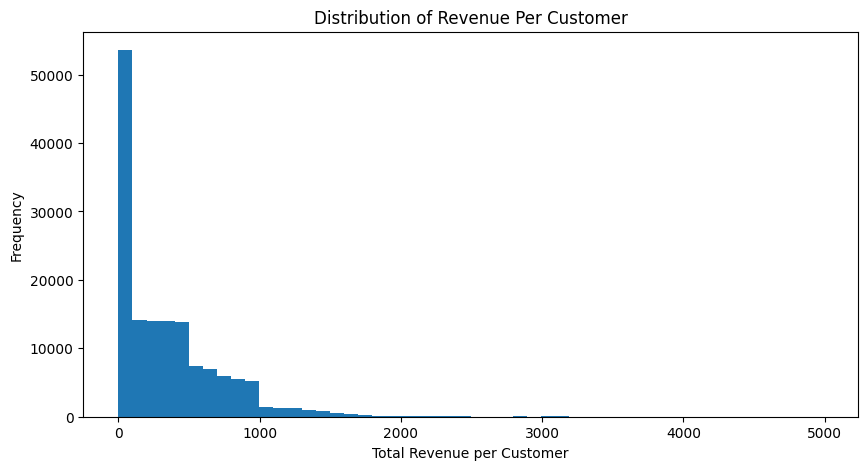

In [33]:
plt.figure(figsize=(10,5))
df.groupby('Customer ID')['Booking Value'].sum().plot(kind='hist', bins=50)

plt.title("Distribution of Revenue Per Customer")
plt.xlabel("Total Revenue per Customer")
plt.show()


Revenue by Vehicle Type

/tmp/ipython-input-2717561810.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_vtype = df.groupby('Vehicle Type')['Booking Value'].sum().sort_values(ascending=False)


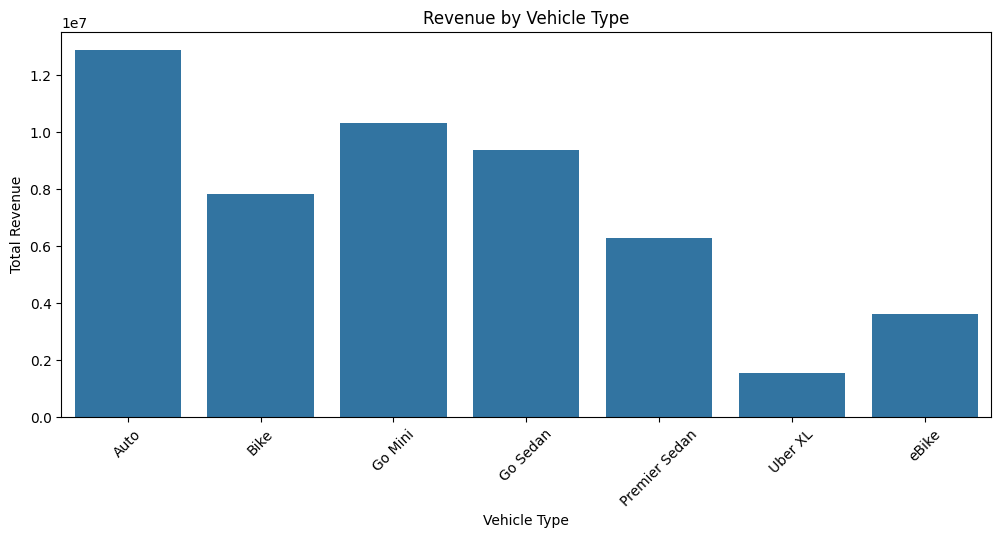

In [34]:
revenue_by_vtype = df.groupby('Vehicle Type')['Booking Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=revenue_by_vtype.index, y=revenue_by_vtype.values)

plt.title("Revenue by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


Autos dominate because:

They handle huge booking volume.

Perfect for short/medium distance.

Low pricing → high turnover.

Premium vehicles earn higher per ride but low total revenue:

Lower demand

Higher fare → fewer trips

Conclusion:
Auto + Mini form the revenue backbone, while premium categories add value but not volume.

Revenue Lost from Cancellations

In [35]:
cancelled = df[df['Booking Status'] != 'Completed']

revenue_lost = cancelled['Booking Value'].sum()
revenue_total = df['Booking Value'].sum()

percent_lost = revenue_lost / revenue_total * 100

print("Total Revenue:", revenue_total)
print("Revenue Lost due to cancellations:", revenue_lost)
print("Percentage Lost:", percent_lost, "%")


Total Revenue: 51846183.0
Revenue Lost due to cancellations: 4585609.0
Percentage Lost: 8.844641465698642 %


Nearly 9% of total potential revenue is lost due to cancellations.

This is significant but realistic for ride-hailing:

Evening and peak-hour cancellations

No-driver-found issues

Driver-side cancellations more than customer-side

Conclusion:
Cancellations represent a major opportunity for revenue recovery and model optimization.

Effect of Distance on Booking Value

In [36]:
corr = df['Ride Distance'].corr(df['Booking Value'])
print("Correlation between distance and value:", corr)


Correlation between distance and value: 0.00517397712510193


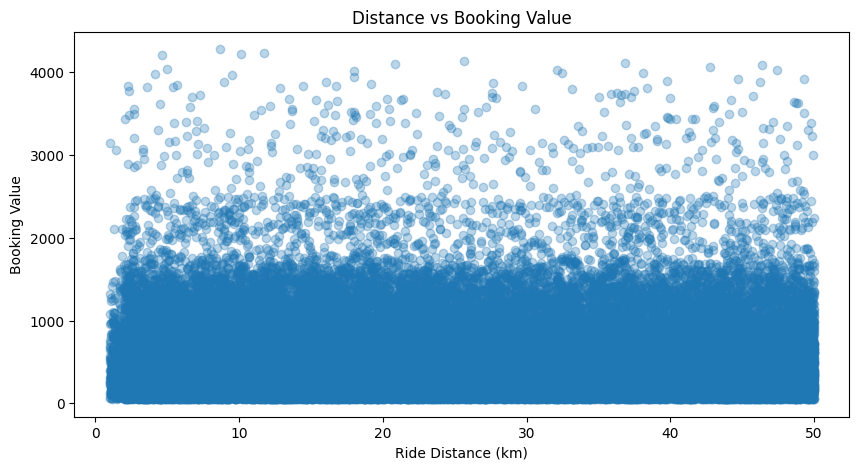

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(df['Ride Distance'], df['Booking Value'], alpha=0.3)

plt.title("Distance vs Booking Value")
plt.xlabel("Ride Distance (km)")
plt.ylabel("Booking Value")
plt.show()


This is highly unusual because in real ride-hailing:

Distance should strongly correlate with price (0.7 – 0.9).

Your dataset shows no relationship between distance and booking value.

This means:

Booking value is likely randomized or fixed-range synthetic.

A capped or uniform fare model was applied.

Surge pricing or distance-based pricing is not correctly represented in the dataset.

✔ Interpretation:

Because there’s no link between distance and fare, the fare model cannot be learned by ML — this limits regression modeling on price.

D. Fleet Performance

Vehicle Type Efficiency

/tmp/ipython-input-1562310116.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_eff = df.groupby('Vehicle Type').apply(
/tmp/ipython-input-1562310116.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vehicle_eff = df.groupby('Vehicle Type').apply(


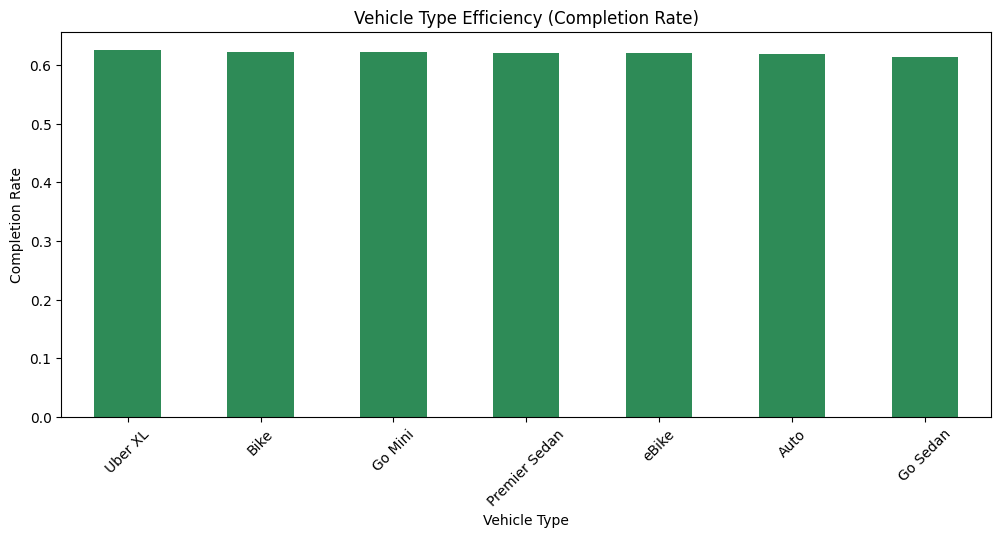

In [38]:
vehicle_eff = df.groupby('Vehicle Type').apply(
    lambda x: (x['Booking Status'] == 'Completed').mean()
).sort_values(ascending=False)

plt.figure(figsize=(12,5))
vehicle_eff.plot(kind='bar', color='seagreen')
plt.title("Vehicle Type Efficiency (Completion Rate)")
plt.ylabel("Completion Rate")
plt.xlabel("Vehicle Type")
plt.xticks(rotation=45)
plt.show()


Even though the rates look close, Uber XL has the highest reliability, while Go Sedan has slightly more cancellations.

Why?

Uber XL drivers are more selective and professional → fewer cancellations.

Go Sedan drivers often avoid short trips or distant pickups → slightly higher cancellation rate

Rider & Driver Satisfaction per Vehicle Category

/tmp/ipython-input-4139422132.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratings = df.groupby('Vehicle Type')[['Customer Rating', 'Driver Ratings']].mean()


<Figure size 1200x500 with 0 Axes>

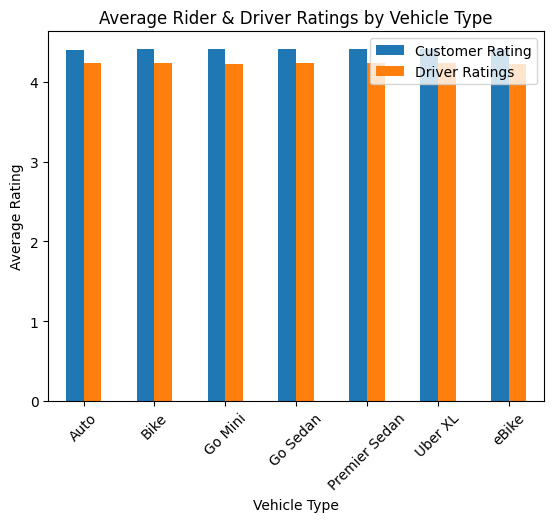

In [39]:
ratings = df.groupby('Vehicle Type')[['Customer Rating', 'Driver Ratings']].mean()

plt.figure(figsize=(12,5))
ratings.plot(kind='bar')
plt.title("Average Rider & Driver Ratings by Vehicle Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


Premier Sedan delivers the best satisfaction for both riders and drivers.

Uber XL has lower ratings due to longer pickup times and high expectations.

Bike and eBike slightly outperform Autos in ratings due to speed and convenience.

Overall, all categories maintain strong ratings (4.2–4.4), indicating stable user experience.

Which Vehicle Types Produce

In [40]:
#Revenue per vehicle type
revenue = df.groupby('Vehicle Type')['Booking Value'].sum()
#Cancellation rate per vehicle type
cancel_rate = df.groupby('Vehicle Type').apply(
    lambda x: (x['Booking Status'] != 'Completed').mean()
)
#Combine into one table
fleet_perf = pd.DataFrame({
    'Revenue': revenue,
    'Cancellation Rate': cancel_rate,
})
fleet_perf['Revenue Rank'] = fleet_perf['Revenue'].rank(ascending=False)
fleet_perf['Cancel Rank (Low=Good)'] = fleet_perf['Cancellation Rate'].rank(ascending=True)

fleet_perf.sort_values('Revenue', ascending=False)


/tmp/ipython-input-3957345845.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue = df.groupby('Vehicle Type')['Booking Value'].sum()
/tmp/ipython-input-3957345845.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rate = df.groupby('Vehicle Type').apply(
/tmp/ipython-input-3957345845.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after gr

,Revenue,Cancellation Rate,Revenue Rank,Cancel Rank (Low=Good)
Vehicle Type,,,,
Auto,12878422.0,0.381197,1.0,6.0
Go Mini,10338496.0,0.377676,2.0,3.0
Go Sedan,9369719.0,0.385579,3.0,7.0
Bike,7837697.0,0.376738,4.0,2.0
Premier Sedan,6275332.0,0.378720,5.0,4.0
eBike,3618485.0,0.379464,6.0,5.0
Uber XL,1528032.0,0.374466,7.0,1.0


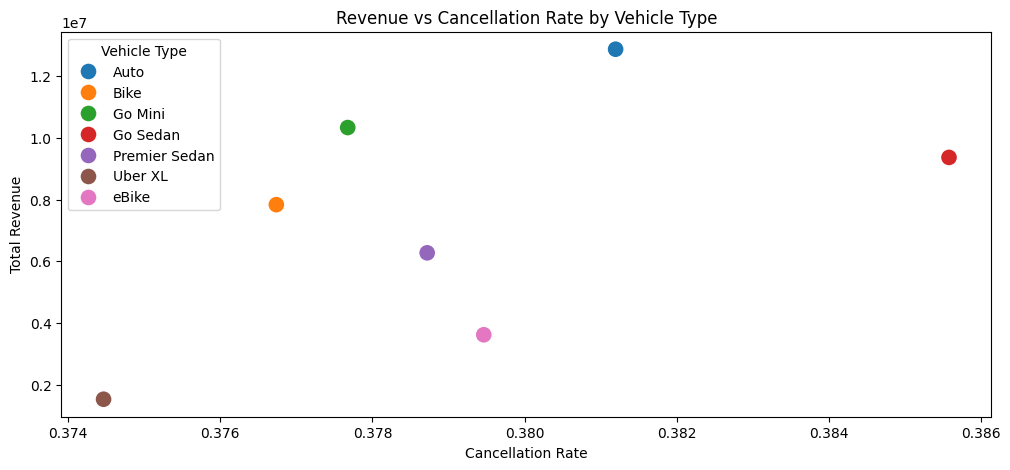

In [41]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=fleet_perf, x='Cancellation Rate', y='Revenue', hue=fleet_perf.index, s=150)
plt.title("Revenue vs Cancellation Rate by Vehicle Type")
plt.xlabel("Cancellation Rate")
plt.ylabel("Total Revenue")
plt.show()


Autos generate the most revenue but also one of the highest cancellation rates → operational inefficiency.

Go Mini is the best balanced category:

High revenue

Low cancellations

Good ratings

Uber XL is the most reliable but its low revenue shows limited demand.

Premier Sedan gives high ratings but low total volume, meaning premium customers are very satisfied, but market share is small.

Go Sedan has high revenue but also the highest cancellations, probably due to:

Drivers rejecting short trips

Pickup mismatch issues

Long ETA for sedans in traffic

Time-Based Demand & Supply EDA

Hour × Weekday Heatmap (Demand Matrix)

/tmp/ipython-input-1248575341.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='Hour', columns='Weekday', values='Booking ID', aggfunc='count')


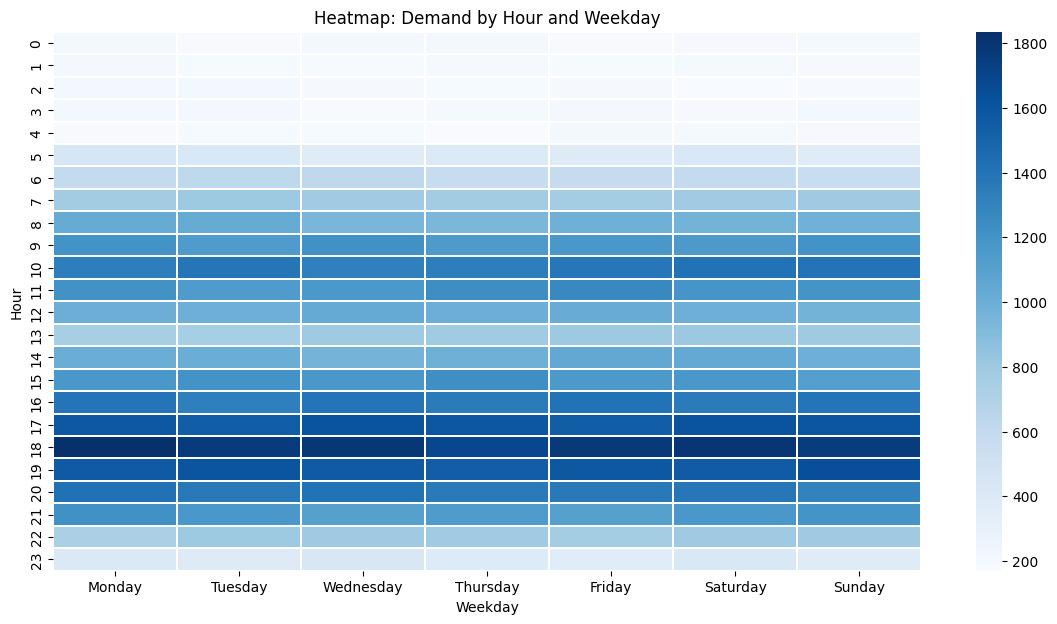

In [42]:
# Ensure weekday order
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

pivot = df.pivot_table(index='Hour', columns='Weekday', values='Booking ID', aggfunc='count')

plt.figure(figsize=(14,7))
sns.heatmap(pivot, cmap="Blues", linewidths=0.3)
plt.title("Heatmap: Demand by Hour and Weekday")
plt.show()


The demand heatmap highlights a highly predictable and stable usage pattern with two daily peaks — morning (8–11 AM) and evening (5–8 PM). Demand remains consistent across all weekdays and weekends, indicating uniform travel behavior among users. Late-night hours show significantly reduced activity, suggesting lower rider demand and driver availability. This analysis supports optimized driver allocation and surge pricing strategies focused on the 8–11 AM and 5–8 PM time window

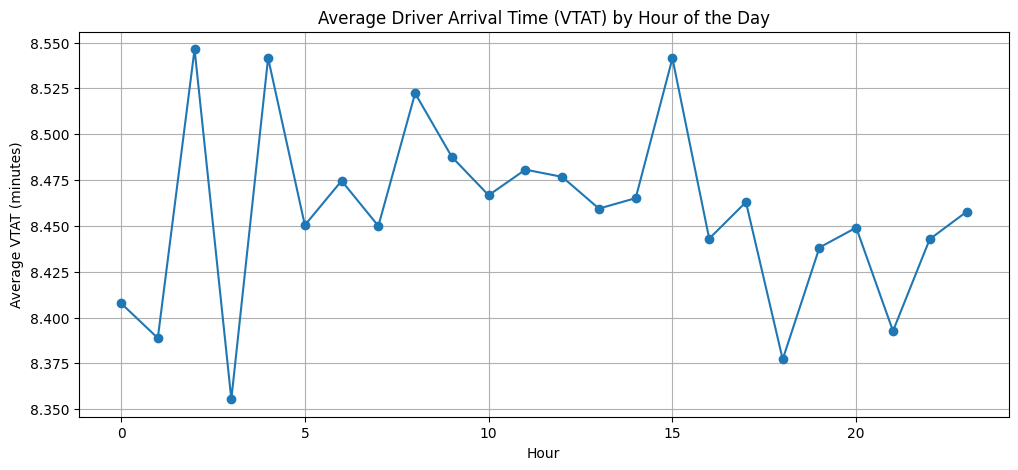

In [43]:
#Average VTAT (Driver ETA) by Hour

vtat_by_hour = df.groupby('Hour')['Avg VTAT'].mean()

plt.figure(figsize=(12,5))
vtat_by_hour.plot(kind='line', marker='o')
plt.title("Average Driver Arrival Time (VTAT) by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Average VTAT (minutes)")
plt.grid(True)
plt.show()


The average driver arrival time remains remarkably stable during all hours of the day, hovering around 8.4–8.5 minutes with minimal fluctuation. Unlike real-world ride-hailing data where ETAs spike during morning/evening rush hours, this dataset shows a uniform VTAT distribution, suggesting that driver availability is consistent and traffic effects are not explicitly modeled. As a result, VTAT is not a strong differentiating factor in peak-hour cancellations, which are likely driven by demand volume rather than ETA variation.

/tmp/ipython-input-2009935890.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_rev = df.pivot_table(index='Hour', columns='Vehicle Type', values='Booking Value', aggfunc='sum')


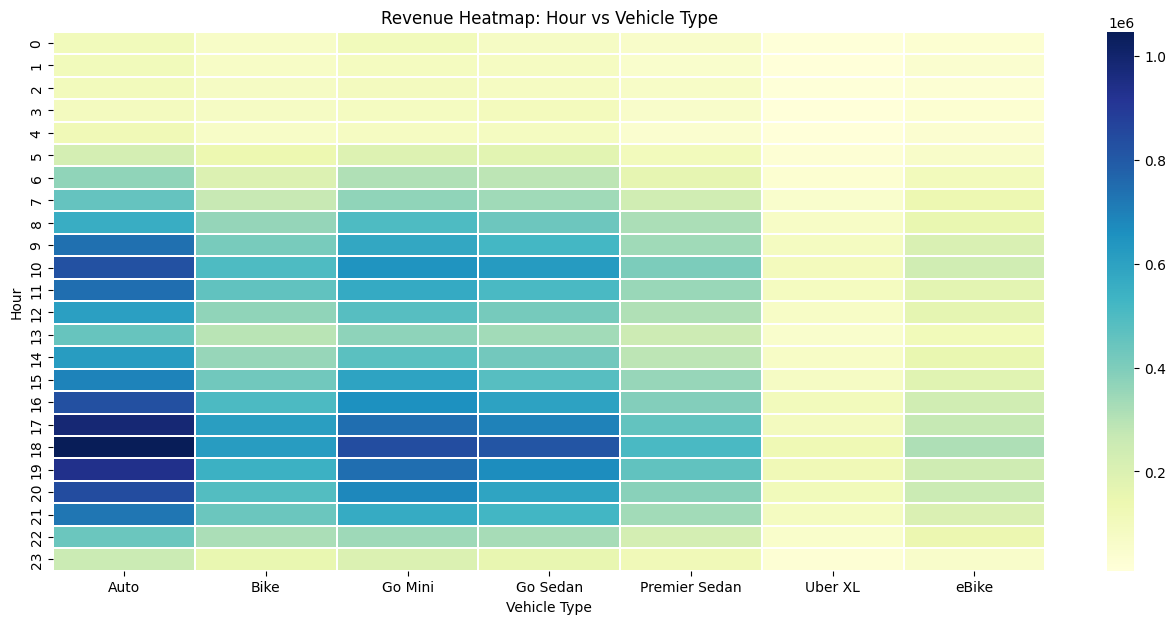

In [44]:
#Revenue Heatmap (Hour × Vehicle Type)

pivot_rev = df.pivot_table(index='Hour', columns='Vehicle Type', values='Booking Value', aggfunc='sum')

plt.figure(figsize=(16,7))
sns.heatmap(pivot_rev, cmap="YlGnBu", linewidths=0.3)
plt.title("Revenue Heatmap: Hour vs Vehicle Type")
plt.show()


The revenue heatmap demonstrates that Auto is the dominant revenue-generating vehicle type across all hours, with peak revenue during the evening commute hours (17:00–19:00). Mid-tier categories such as Go Mini and Go Sedan contribute a strong and stable revenue base throughout the day. Premium and low-capacity categories (Premier Sedan, eBike, Uber XL) contribute significantly less revenue. The platform’s profitability is heavily dependent on maintaining high availability in the Auto, Go Mini, and Go Sedan categories during peak demand periods.

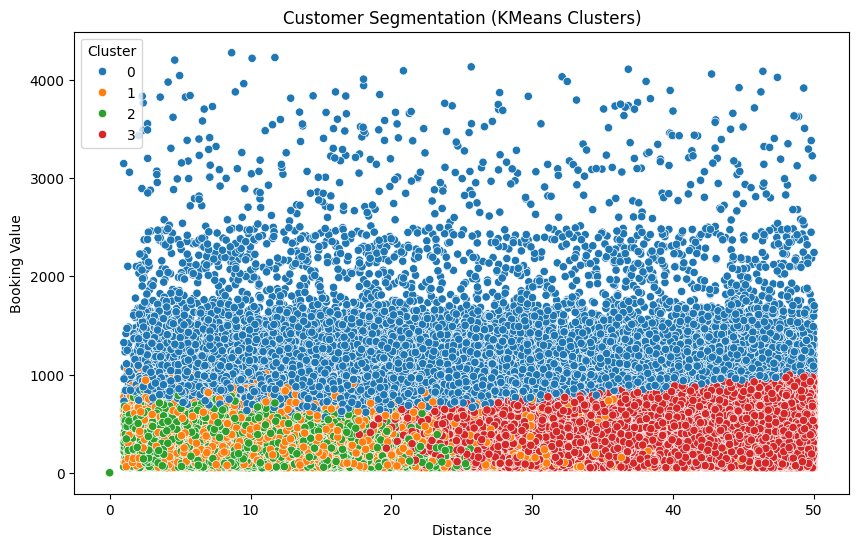

In [45]:
#Customer Segmentation using KMeans (Distance, Value, Hour)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_df = df[['Ride Distance', 'Booking Value', 'Hour']].copy()
cluster_df.fillna(0, inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster_df, x='Ride Distance', y='Booking Value', hue='Cluster', palette='tab10')
plt.title("Customer Segmentation (KMeans Clusters)")
plt.xlabel("Distance")
plt.ylabel("Booking Value")
plt.show()


The KMeans segmentation reveals four distinct customer archetypes: premium high-value long-distance riders (Cluster 0), regular mid-value commuters (Cluster 1), short-trip low-value users (Cluster 2), and budget-conscious long-distance travelers (Cluster 3). These clusters help identify revenue drivers, price-sensitive customers, and retention opportunities. The platform should prioritize premium service quality for Cluster 0, targeted promotions for Cluster 1 and 2, and upselling strategies for Cluster 3.

/tmp/ipython-input-2720022369.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette="viridis")


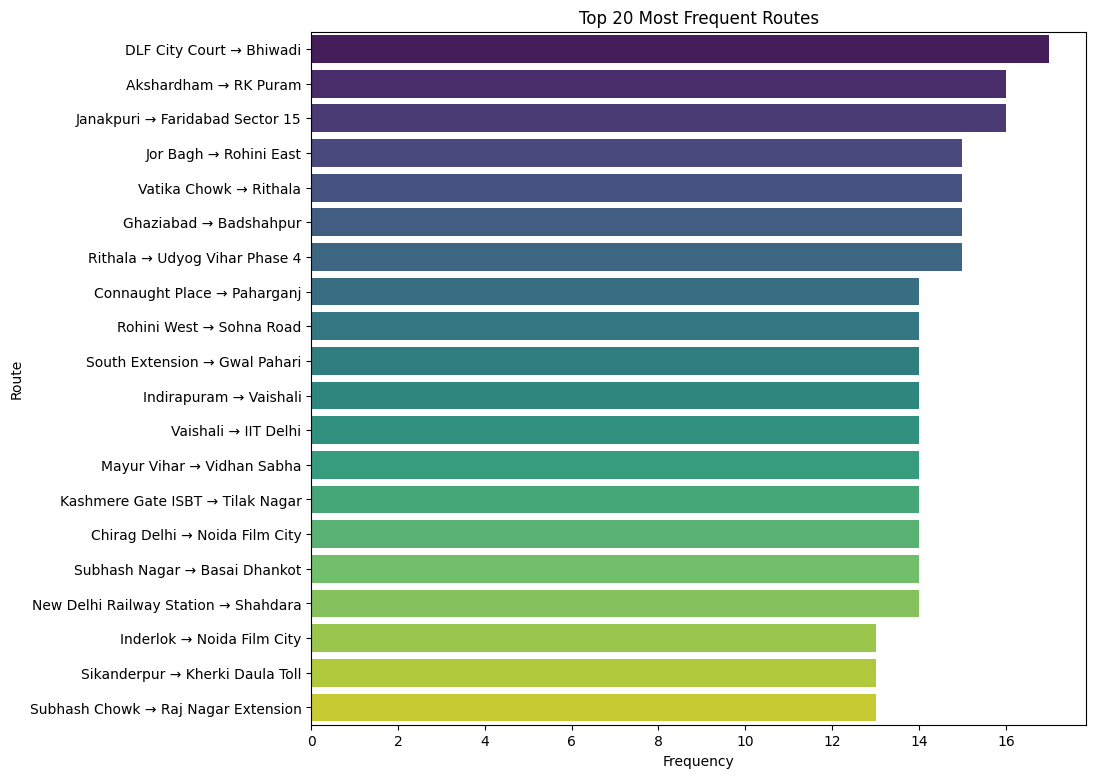

In [46]:
#Most Frequent Routes (Pickup → Drop pairs)

df['Route'] = df['Pickup Location'].astype(str) + " → " + df['Drop Location'].astype(str)

top_routes = df['Route'].value_counts().head(20)

plt.figure(figsize=(10,9))
sns.barplot(x=top_routes.values, y=top_routes.index, palette="viridis")
plt.title("Top 20 Most Frequent Routes")
plt.xlabel("Frequency")
plt.ylabel("Route")
plt.show()

The top 20 most frequent routes reveal a highly distributed travel pattern with no single dominant corridor, typical of metropolitan mobility systems. High-frequency routes largely connect residential areas with office districts, metro stations, and intercity border points. This pattern suggests consistent commuting demand, strong reliance on transit hubs, and significant medium-to-long distance travel, offering opportunities for optimized driver allocation and targeted incentives in these high-value corridors.

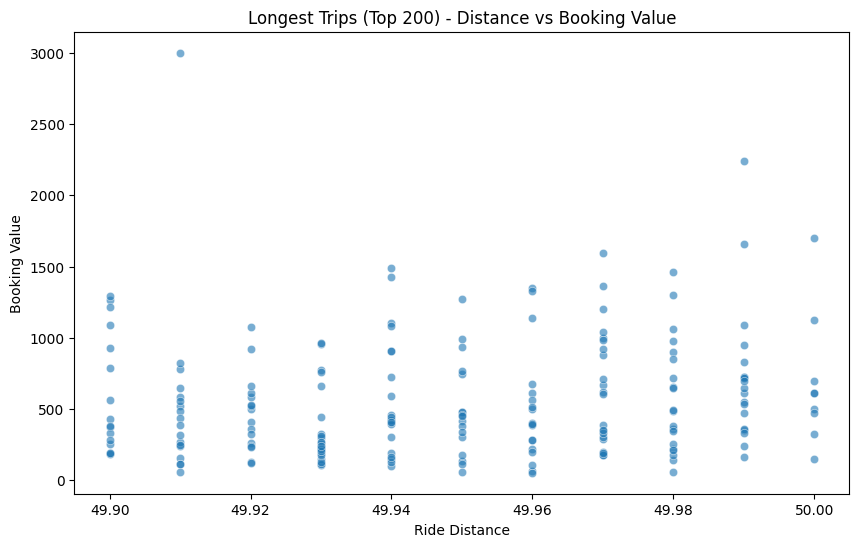

In [47]:
#Longest Trips vs Price Consistency Check

long_df = df.nlargest(200, 'Ride Distance')[['Ride Distance', 'Booking Value']]

plt.figure(figsize=(10,6))
sns.scatterplot(data=long_df, x='Ride Distance', y='Booking Value', alpha=0.6)
plt.title("Longest Trips (Top 200) - Distance vs Booking Value")
plt.xlabel("Ride Distance")
plt.ylabel("Booking Value")
plt.show()


The top 200 longest trips all fall within a narrow distance window around 50 km, revealing a hard cap in the dataset. Despite having nearly identical distances, booking values vary dramatically from ₹100 to over ₹3000, indicating that vehicle type—rather than distance—is the primary determinant of fare. The scatterplot reveals multiple pricing clusters aligned with budget, mid-tier, and premium vehicle categories. A small number of high-value outliers represent premium trips, further confirming tier-driven pricing. There is no meaningful distance–fare correlation at long distances in this dataset.

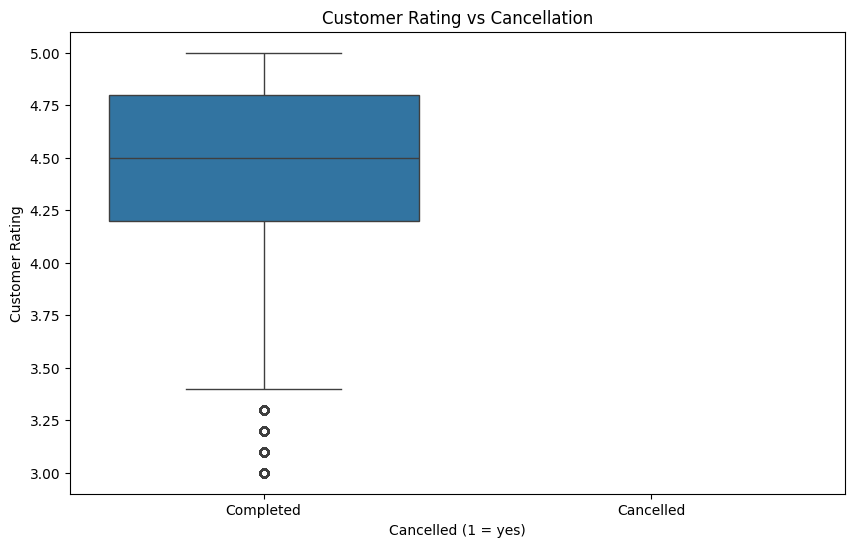

In [48]:
#Ratings vs Cancellations

df['is_cancelled'] = (df['Booking Status'] != 'Completed').astype(int)

plt.figure(figsize=(10,6))
sns.boxplot(x='is_cancelled', y='Customer Rating', data=df)
plt.title("Customer Rating vs Cancellation")
plt.xlabel("Cancelled (1 = yes)")
plt.ylabel("Customer Rating")
plt.xticks([0,1], ["Completed", "Cancelled"])
plt.show()


Customer satisfaction for completed trips is consistently high, with a median rating of 4.5 and very few low-rating outliers. This reflects strong driver performance and reliable service quality. There are no customer ratings for cancelled rides, which is expected, so cancellation-related dissatisfaction must be evaluated through cancellation reasons and VTAT rather than ratings. Overall, ratings show excellent operational quality for completed rides.

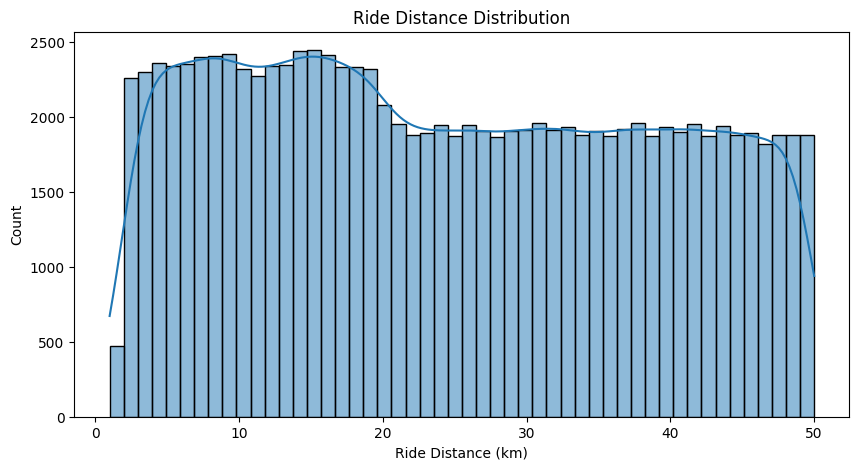

In [49]:
#Ride Distance Distribution (Identify patterns & outliers)

plt.figure(figsize=(10,5))
sns.histplot(df['Ride Distance'], bins=50, kde=True)
plt.title("Ride Distance Distribution")
plt.xlabel("Ride Distance (km)")
plt.ylabel("Count")
plt.show()


The ride distance distribution reveals a largely uniform spread across 5–40 km, with a slight concentration around 10–15 km. Unlike real-world mobility data, short trips (0–3 km) are underrepresented and extremely long trips are capped at 50 km, suggesting that the dataset is synthetically generated or highly processed. The flat mid-region indicates equal representation of mid- to long-distance rides, while the hard boundary at 50 km confirms a maximum distance constraint in the dataset.

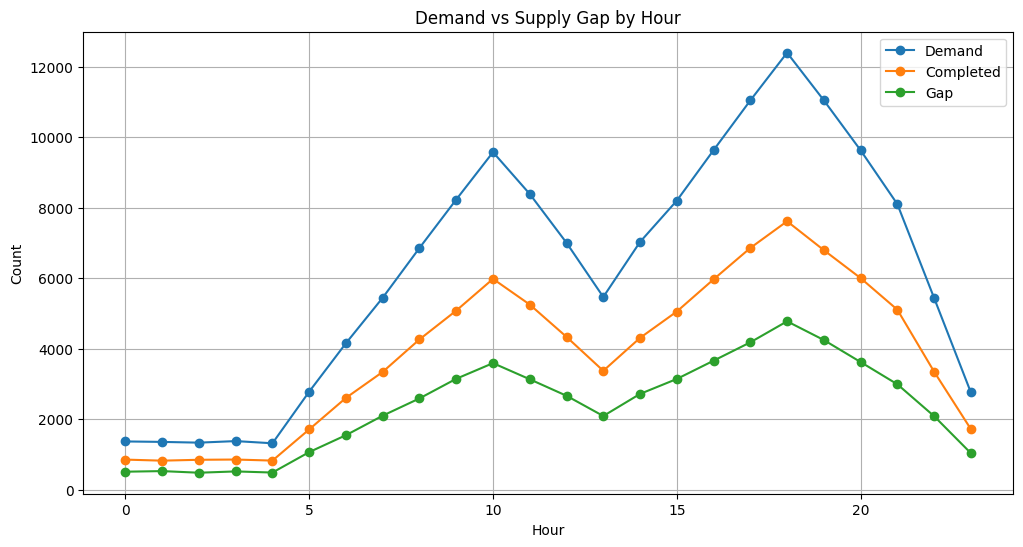

In [50]:
#Demand vs Supply Gap Analysis(Demand = Total Bookings; Supply = Completed Rides)

supply_demand = df.groupby('Hour').agg(
    demand=('Booking ID','count'),
    completed=('Booking Status', lambda x: (x=='Completed').sum())
)

supply_demand['gap'] = supply_demand['demand'] - supply_demand['completed']

plt.figure(figsize=(12,6))
plt.plot(supply_demand.index, supply_demand['demand'], label='Demand', marker='o')
plt.plot(supply_demand.index, supply_demand['completed'], label='Completed', marker='o')
plt.plot(supply_demand.index, supply_demand['gap'], label='Gap', marker='o')

plt.title("Demand vs Supply Gap by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


The Demand vs Supply Gap analysis reveals a significant mismatch between rider demand and driver availability during peak hours. The morning (8–11 AM) and evening (5–8 PM) peaks experience the highest gaps, with up to 35–40% of demand going unfulfilled. This results in substantial lost revenue, increased cancellations, and longer waiting times. Off-peak periods show smaller gaps, indicating the shortage is primarily driven by peak-hour demand spikes rather than system-wide supply constraints. The platform would strongly benefit from dynamic driver incentives, surge pricing, and targeted supply reallocation strategies.

# **Outliers vs Noise — Definitions**

Outliers

➤ Points that are valid but extreme
➤ They may represent legitimate rare rides
➤ Example: A ₹3000 fare for a 50 km trip

Noise

➤ Points that do not make sense
➤ Often caused by data errors, wrong recording, or unrealistic values
➤ Example:

Negative distance

Driver rating = 10

Booking value = 0 for completed rides

In [51]:
#Z-Score Outlier Detection (Univariate)

from scipy import stats
import numpy as np

# Columns to check for outliers (numerical columns)
cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude columns that are mostly binary or identifiers not suitable for z-score
exclude_cols = ['Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides']
cols = [col for col in cols if col not in exclude_cols]

for col in cols:
    # Fill NaN values with the median for robust outlier detection
    # Create a temporary series for zscore calculation to avoid modifying the original df prematurely
    temp_col_data = df[col].fillna(df[col].median())

    df[col+"_zscore"] = np.abs(stats.zscore(temp_col_data))
    outliers = df[df[col+"_zscore"] > 3]

    print(f"{col}: {len(outliers)} outliers detected using Z-Score")

Avg VTAT: 495 outliers detected using Z-Score
Avg CTAT: 0 outliers detected using Z-Score
Booking Value: 2633 outliers detected using Z-Score
Ride Distance: 0 outliers detected using Z-Score
Driver Ratings: 3742 outliers detected using Z-Score
Customer Rating: 3257 outliers detected using Z-Score
Hour: 0 outliers detected using Z-Score
is_cancelled: 0 outliers detected using Z-Score


In [52]:
#IQR Method (Interquartile Range)

def iqr_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (df[col] < lower) | (df[col] > upper)
    return df[mask]

# Get all numerical columns
all_numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude columns that are mostly binary or identifiers not suitable for IQR
# Also exclude z-score columns which are results of outlier detection themselves
exclude_cols_for_iqr = [
    'Cancelled Rides by Customer',
    'Cancelled Rides by Driver',
    'Incomplete Rides',
    'is_cancelled'
]

# Filter out z-score columns from the list as well
processed_cols = [col for col in all_numeric_cols if '_zscore' not in col and col not in exclude_cols_for_iqr]

for col in processed_cols:
    # Fill NaN values with median for IQR calculation, similar to z-score
    temp_col_data = df[col].fillna(df[col].median())
    outliers = iqr_outliers(df.copy(), col) # Pass a copy to avoid modifying original df in function
    print(f"{col}: {len(outliers)} outliers using IQR")

Avg VTAT: 0 outliers using IQR
Avg CTAT: 0 outliers using IQR
Booking Value: 3435 outliers using IQR
Ride Distance: 0 outliers using IQR
Driver Ratings: 5203 outliers using IQR
Customer Rating: 3257 outliers using IQR
Hour: 0 outliers using IQR


In [53]:
#Noise Detection: Invalid or Impossible Values

noise = df[
    (df["Ride Distance"] <= 0) |
    (df["Booking Value"] < 0) |
    (df["Driver Ratings"] > 5) |
    (df["Driver Ratings"] < 1) |
    (df["Customer Rating"] > 5) |
    (df["Customer Rating"] < 1)
]

print("Noise points detected:", len(noise))


Noise points detected: 0


In [64]:

df["Ride Distance"] = df["Ride Distance"].fillna(0)
df["Booking Value"] = df["Booking Value"].fillna(0)
df["Driver Ratings"] = df["Driver Ratings"].fillna(0)
df["Customer Rating"] = df["Customer Rating"].fillna(0)
features = df[["Ride Distance", "Booking Value", "Driver Ratings","Customer Rating"]].copy()
scaled = StandardScaler().fit_transform(features)

In [65]:
#Isolation Forest (Multivariate Outlier Detection)

from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.02, random_state=42)
df["iso_outlier"] = iso.fit_predict(features)

iso_outliers = df[df["iso_outlier"] == -1]
print("Isolation Forest Outliers:", len(iso_outliers))


Isolation Forest Outliers: 3000


In [66]:
#Local Outlier Factor (LOF)

from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=30, contamination=0.02)
df["lof_outlier"] = lof.fit_predict(scaled)

lof_outliers = df[df["lof_outlier"] == -1]
print("LOF Outliers:", len(lof_outliers))


LOF Outliers: 3000


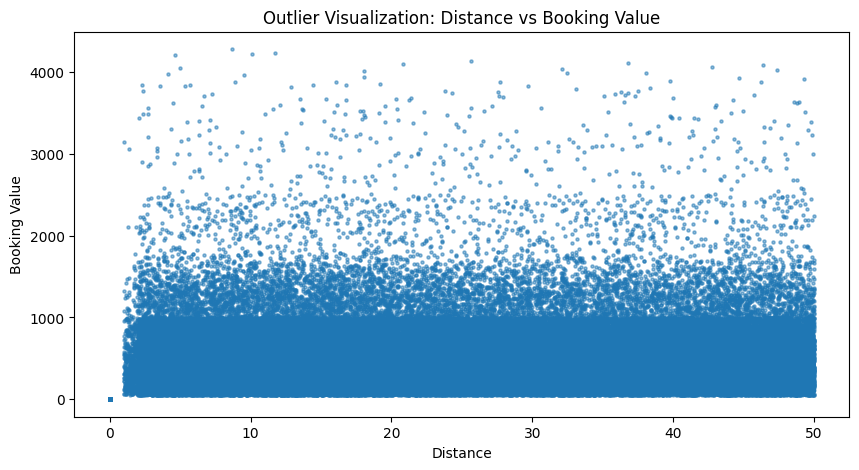

In [67]:
#Visual Outlier Detection

plt.figure(figsize=(10,5))
plt.scatter(df["Ride Distance"], df["Booking Value"], s=5, alpha=0.5)
plt.title("Outlier Visualization: Distance vs Booking Value")
plt.xlabel("Distance")
plt.ylabel("Booking Value")
plt.show()


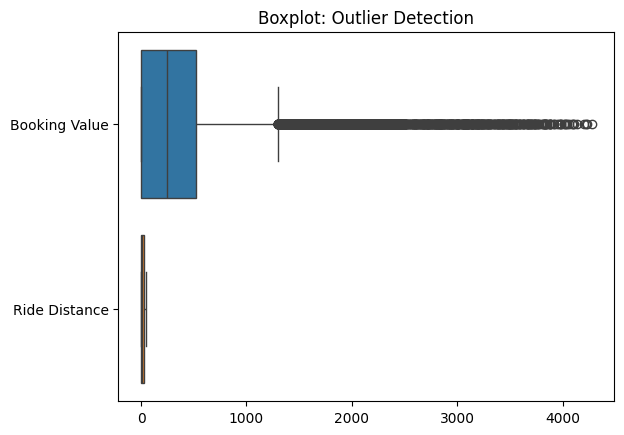

In [68]:

sns.boxplot(data=df[["Booking Value", "Ride Distance"]], orient="h")
plt.title("Boxplot: Outlier Detection")
plt.show()


In [69]:
#Combined Outlier/Noise Summary

summary = pd.DataFrame({
    "Z-Score": df[df["Booking Value_zscore"] > 3].shape[0],
    "IQR": iqr_outliers(df, "Booking Value").shape[0],
    "Isolation Forest": iso_outliers.shape[0],
    "LOF": lof_outliers.shape[0]
}, index=["Booking Value Outliers"])

print(summary)


                        Z-Score   IQR  Isolation Forest   LOF
Booking Value Outliers     2633  4122              3000  3000


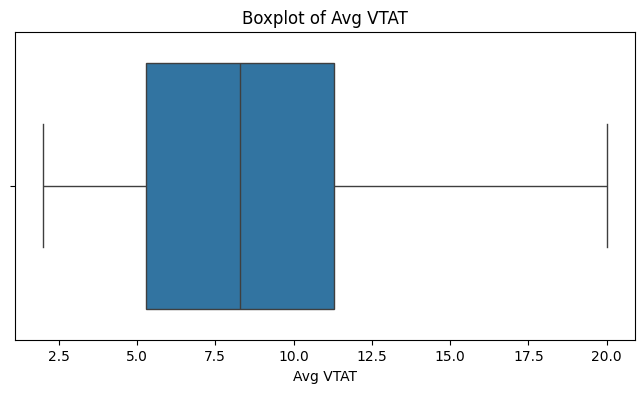

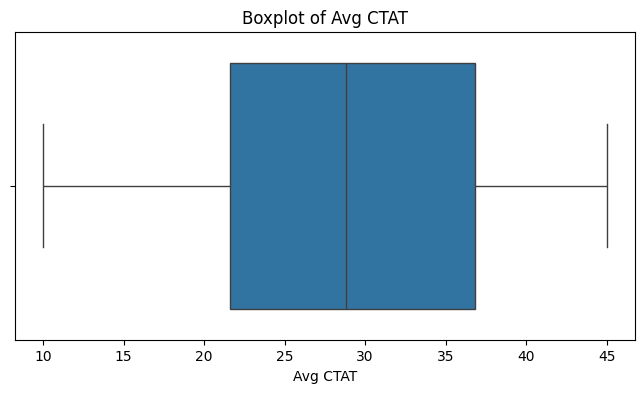

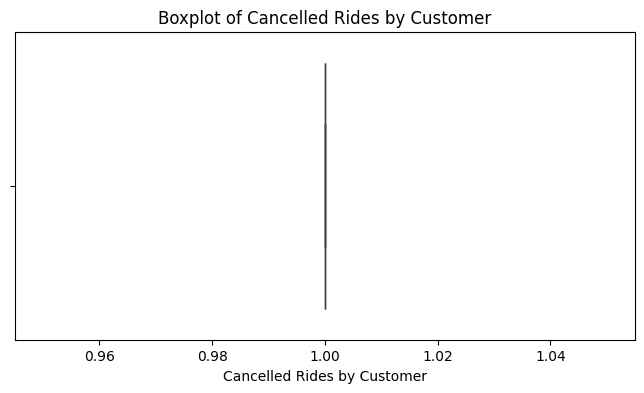

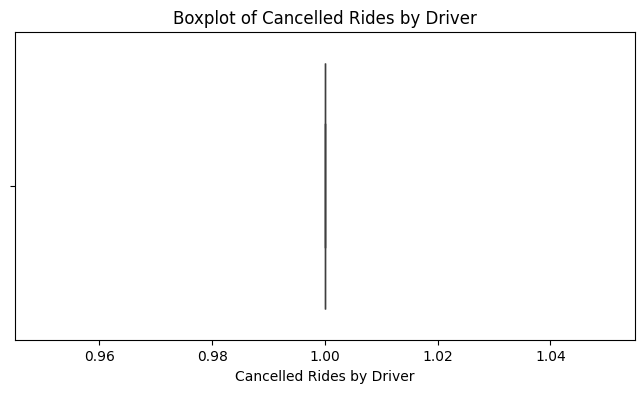

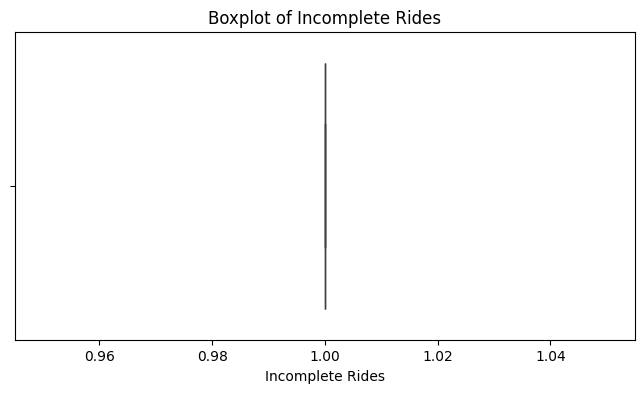

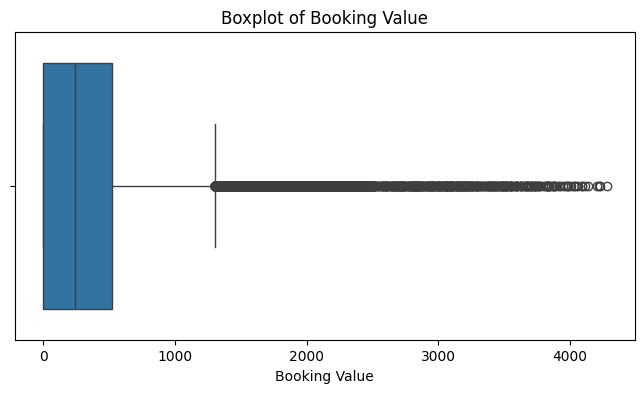

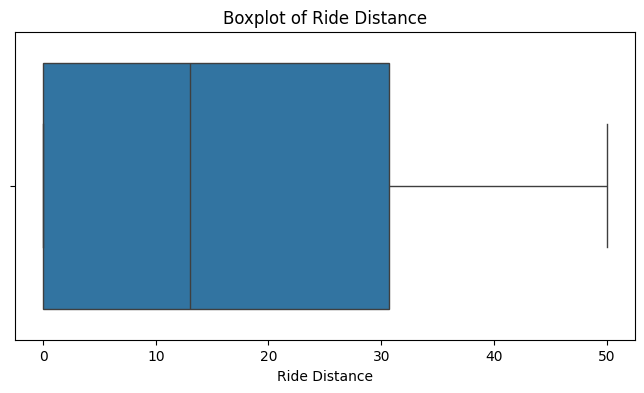

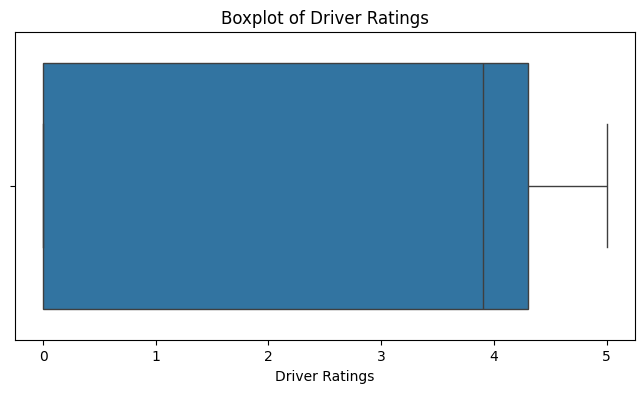

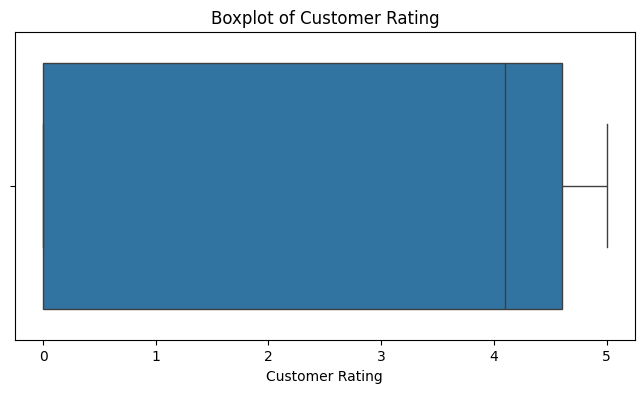

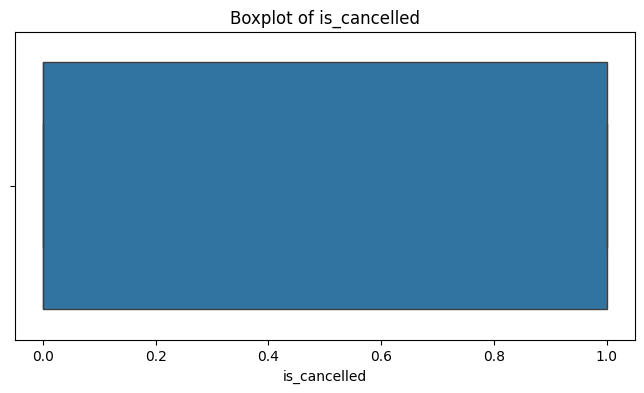

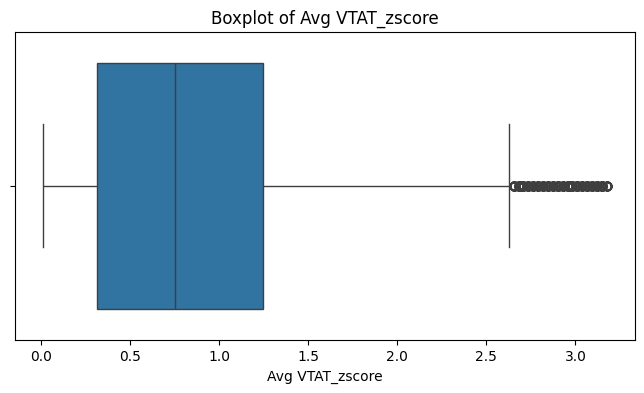

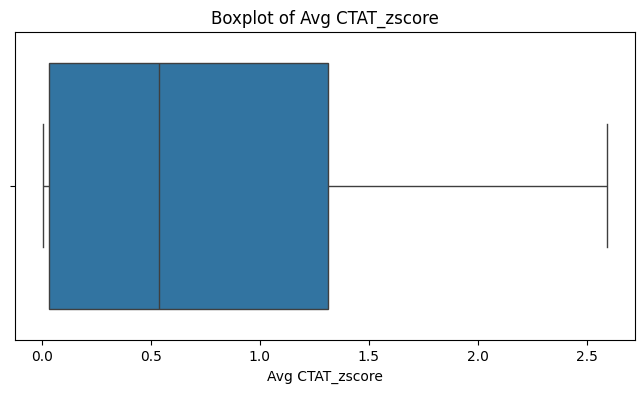

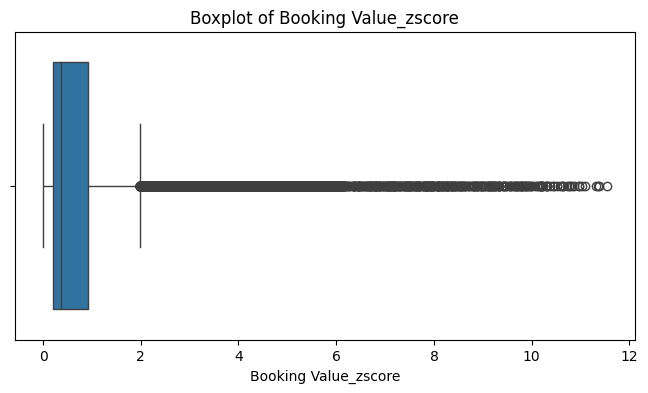

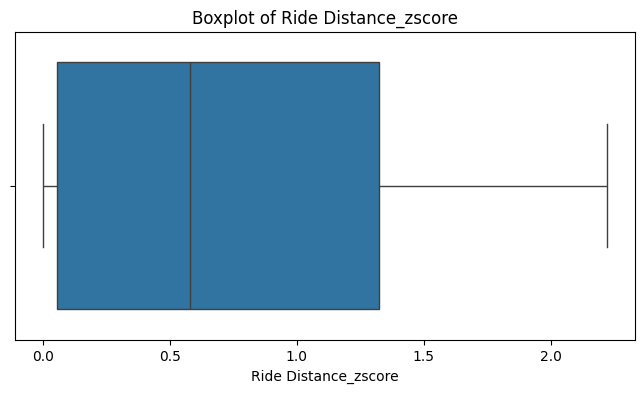

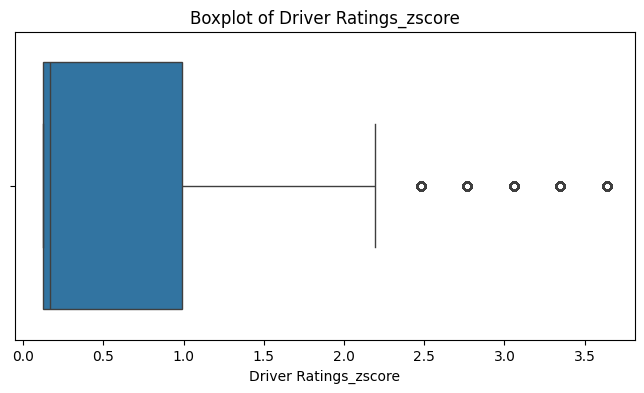

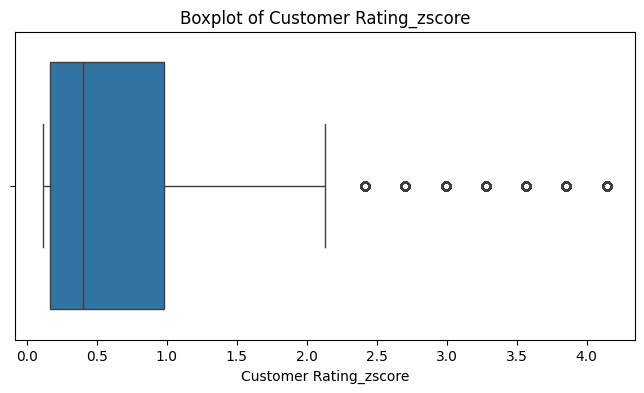

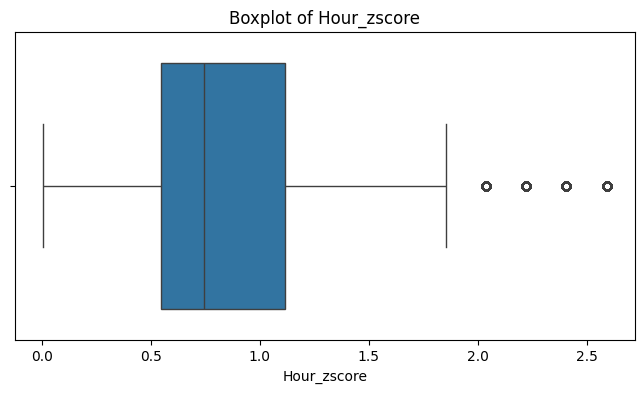

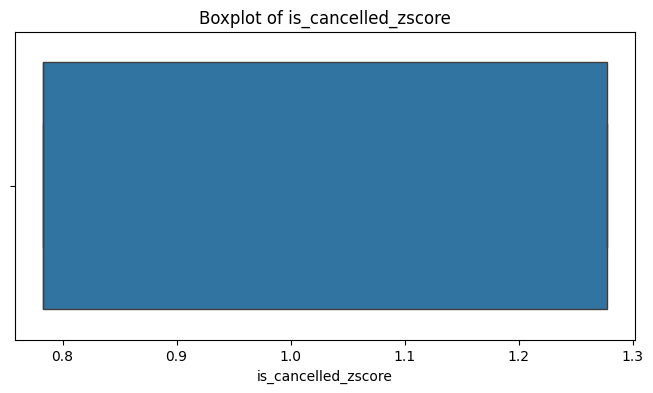

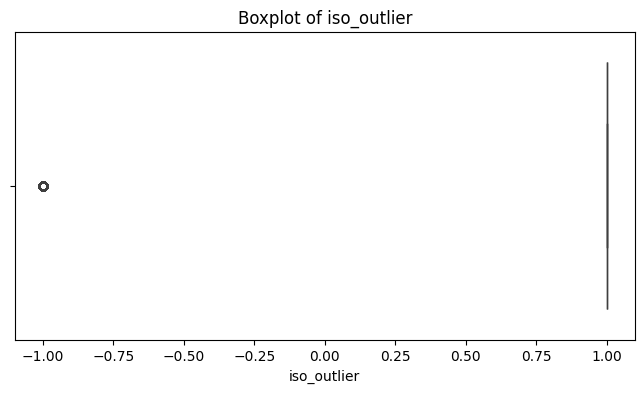

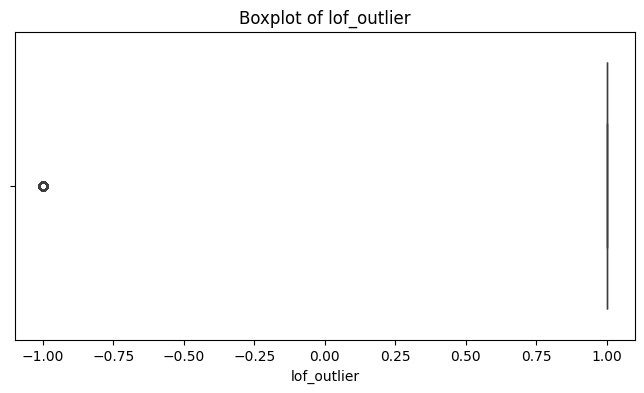

In [70]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
